# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import os

# For plot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [74]:
# Import all csv data
datatypes = pd.read_csv('datatypes.csv')
nodes = pd.read_csv('nodes.csv')
sensors = pd.read_csv('sensors.csv')
volcanos = pd.read_csv('volcanos.csv')
datapoints = pd.read_csv('datapoints.csv')

In [75]:
## Exploratory Data Ananlysis

In [76]:
datatypes.head()

id                            type  \
0  35dcb3c0-8679-11e6-bda3-ef77801087ee                     temperature   
1  35dcb3c1-8679-11e6-bda3-ef77801087ee                        pressure   
2  35dcb3c2-8679-11e6-bda3-ef77801087ee                        humidity   
3  35dcdad0-8679-11e6-bda3-ef77801087ee    carbon dioxide concentration   
4  35dcdad1-8679-11e6-bda3-ef77801087ee  hydrogen sulfide concentration   

             si_unit type_id  
0            celcius     TCA  
1             pascal      PA  
2  relative humidity    HUMA  
3                ppm  GP_CO2  
4                ppm  GP_H2S

In [77]:
datapoints.head()

id      value               timestamp  \
0  764c5e60-8679-11e6-a353-2f6c041e2491     98.000  2016-08-03 04:39:25+00   
1  764c5e61-8679-11e6-a353-2f6c041e2491     33.198  2016-08-03 04:39:25+00   
2  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300  2016-08-03 04:39:25+00   
3  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110  2016-08-03 04:39:25+00   
4  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736  2016-08-03 04:39:25+00   

                              sensor_id  
0  7635c920-8679-11e6-a353-2f6c041e2491  
1  763b9580-8679-11e6-a353-2f6c041e2491  
2  763ca6f0-8679-11e6-a353-2f6c041e2491  
3  763d9150-8679-11e6-a353-2f6c041e2491  
4  763701a1-8679-11e6-a353-2f6c041e2491

In [78]:

datapoints['timestamp']= pd.to_datetime(datapoints['timestamp'])


In [151]:
nodes.head()

id name description location   status  \
0  c5e39fa0-867a-11e6-a353-2f6c041e2491   N1          \N       \N  OFFLINE   
1  c147ece0-8679-11e6-a353-2f6c041e2491   N9          \N       \N  OFFLINE   
2  76309900-8679-11e6-a353-2f6c041e2491   N8          \N       \N  OFFLINE   
3  762b8ff0-8679-11e6-a353-2f6c041e2491  N10          \N       \N  OFFLINE   
4  c14ccee0-8679-11e6-a353-2f6c041e2491   N2          \N       \N  OFFLINE   

                 created_at                       updated_at  \
0 2016-08-17 01:06:49+00:00 2016-09-29 19:28:05.932000+00:00   
1 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.065000+00:00   
2 2016-08-03 22:09:40+00:00 2016-09-29 19:20:17.417000+00:00   
3 2016-08-03 04:39:25+00:00 2016-09-29 19:20:17.431000+00:00   
4 2016-08-10 04:20:22+00:00 2016-09-29 19:20:17.523000+00:00   

                             volcano_id  
0  35dc3e90-8679-11e6-bda3-ef77801087ee  
1  35dc3e90-8679-11e6-bda3-ef77801087ee  
2  35dc3e90-8679-11e6-bda3-ef77801087ee  
3  35dc3e90-8679-11e6-bda3-ef77801087ee  
4  35dc3e90-8679-11e6-bda3-ef77801087ee

In [80]:
nodes['created_at'] = pd.to_datetime(nodes['created_at'])
nodes['updated_at'] = pd.to_datetime(nodes['updated_at'])


In [81]:
sensors['created_at'] = pd.to_datetime(sensors['created_at'])
sensors['updated_at'] = pd.to_datetime(sensors['updated_at'])

In [82]:
volcanos['created_at'] = pd.to_datetime(volcanos['created_at'])
volcanos['updated_at'] = pd.to_datetime(volcanos['updated_at'])

In [83]:
sensors.head()

id description  data_frequency   status  \
0  c15a6370-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1  7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2  763b9580-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3  763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4  763d9150-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

                 created_at                       updated_at  \
0 2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.793000+00:00   
2 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.797000+00:00   
3 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.803000+00:00   
4 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.811000+00:00   

                           data_type_id                               node_id  
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491  
1  35dcdad2-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
2  35dcdad1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
4  35dcb3c1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491

In [84]:
volcanos.head()

id    name  \
0  35dc3e90-8679-11e6-bda3-ef77801087ee  Masaya   

                                         description  \
0  This is the world&#39;s biggest, baddest, most evi...   

                                   location   status  \
0  {11.985318299999999,-86.178342900000004}  OFFLINE   

                        created_at                       updated_at  
0 2016-09-29 19:16:23.419000+00:00 2016-10-07 07:43:05.015000+00:00

In [85]:
print(datatypes.shape,nodes.shape,sensors.shape,volcanos.shape, datapoints.shape)

(7, 4) (11, 8) (61, 8) (1, 7) (176534, 4)


In [86]:
datapoints.head()

id      value                 timestamp  \
0  764c5e60-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:39:25+00:00   
1  764c5e61-8679-11e6-a353-2f6c041e2491     33.198 2016-08-03 04:39:25+00:00   
2  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300 2016-08-03 04:39:25+00:00   
3  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110 2016-08-03 04:39:25+00:00   
4  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736 2016-08-03 04:39:25+00:00   

                              sensor_id  
0  7635c920-8679-11e6-a353-2f6c041e2491  
1  763b9580-8679-11e6-a353-2f6c041e2491  
2  763ca6f0-8679-11e6-a353-2f6c041e2491  
3  763d9150-8679-11e6-a353-2f6c041e2491  
4  763701a1-8679-11e6-a353-2f6c041e2491

In [87]:
#datapoints['sensor_id'].value_counts(normalize=True)

In [88]:
#datapoints['id'].value_counts(normalize=True)

## Try some other form of grouping

In [152]:
# new = datapoints.groupby('id')
# #new.nunique()
# new.first()

### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**


In [89]:

datapoints['Day'] = datapoints['timestamp'].dt.day 
datapoints['Month'] = datapoints['timestamp'].dt.month
datapoints['Year'] = datapoints['timestamp'].dt.year
datapoints['Time']=datapoints['timestamp'].dt.time
plots = datapoints.groupby('sensor_id')#.agg(lambda x: list(x))

In [90]:
plots.nunique()

id  value  timestamp  sensor_id  Day  \
sensor_id                                                                      
1248ff60-e707-11e6-89c8-314aa4f67f8c  8816    628       8816          1   31   
7635c920-8679-11e6-a353-2f6c041e2491   935      4        907          1   22   
7635f030-8679-11e6-a353-2f6c041e2491  4831     38       4755          1   21   
7636da90-8679-11e6-a353-2f6c041e2491  4779    354       4755          1   21   
763701a0-8679-11e6-a353-2f6c041e2491  4769    315       4755          1   21   
...                                    ...    ...        ...        ...  ...   
e6678e90-8679-11e6-a353-2f6c041e2491  8493    242       8462          1   24   
e6678e91-8679-11e6-a353-2f6c041e2491  8663    372       8461          1   24   
e66851e0-8679-11e6-a353-2f6c041e2491  8665    500       8461          1   24   
e66851e1-8679-11e6-a353-2f6c041e2491  8523      0       8462          1   24   
e6691530-8679-11e6-a353-2f6c041e2491  8656    255       8461          1   24   

                                      Month  Year  Time  
sensor_id                                                
1248ff60-e707-11e6-89c8-314aa4f67f8c      2     1   687  
7635c920-8679-11e6-a353-2f6c041e2491      2     1   906  
7635f030-8679-11e6-a353-2f6c041e2491      3     1  4638  
7636da90-8679-11e6-a353-2f6c041e2491      3     1  4638  
763701a0-8679-11e6-a353-2f6c041e2491      3     1  4638  
...                                     ...   ...   ...  
e6678e90-8679-11e6-a353-2f6c041e2491      2     1  8076  
e6678e91-8679-11e6-a353-2f6c041e2491      2     1  8075  
e66851e0-8679-11e6-a353-2f6c041e2491      2     1  8075  
e66851e1-8679-11e6-a353-2f6c041e2491      2     1  8076  
e6691530-8679-11e6-a353-2f6c041e2491      2     1  8075  

[61 rows x 8 columns]

In [91]:
def getgroup(sensor_id):
    get = plots.get_group(sensor_id)
    sensorIndex = get.set_index('timestamp', inplace=True)
    return get

def groupget(sensorname,monthno):
    regroup = sensorname.groupby('Month')
    groupno = regroup.get_group(monthno)
    groupfinal = groupno.groupby(["Day"], as_index=False)["value"].max()
    return groupfinal

def custom_plot(x,y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
        #ax = sns.barplot()
    ax.set_ylabel('Value')
    ax.set_xlabel('Day')
    ax.plot(x,y, **plt_kwargs) 
    return(ax)

Text(0.5, 1.0, &#39;Maximum Daily Values for c15a6370 Sensor in August&#39;)

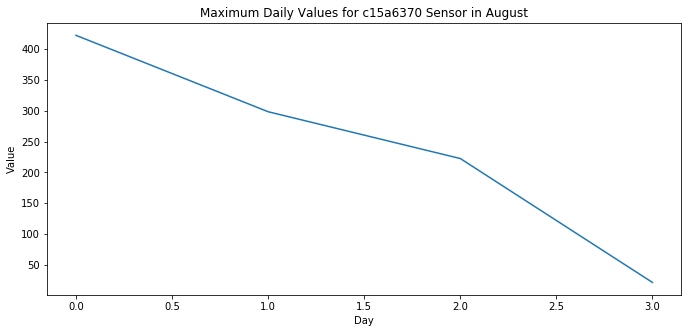

In [92]:
sensor1 = getgroup('c15a6370-8679-11e6-a353-2f6c041e2491')
#sensor1jul = groupget(sensor1,7)
sensor1aug = groupget(sensor1,8)
#sensor1sep = groupget(sensor1,9)
#sensor1oct = groupget(sensor1,10)

plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor1aug.index, y=sensor1aug.value)
plt.title('Maximum Daily Values for c15a6370 Sensor in August')
# plt.subplot(1,2,2)
# custom_plot(x=sensor1sep.index, y=sensor1sep.value)
# plt.title('Maximum Daily Values for c15a6370 Sensor in August')
# plt.subplot(1,2,2)
# custom_plot(x=sensor1oct.index, y=sensor1oct.value)
# plt.title('Maximum Daily Values for c15a6370 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for 7635c920 Sensor in September&#39;)

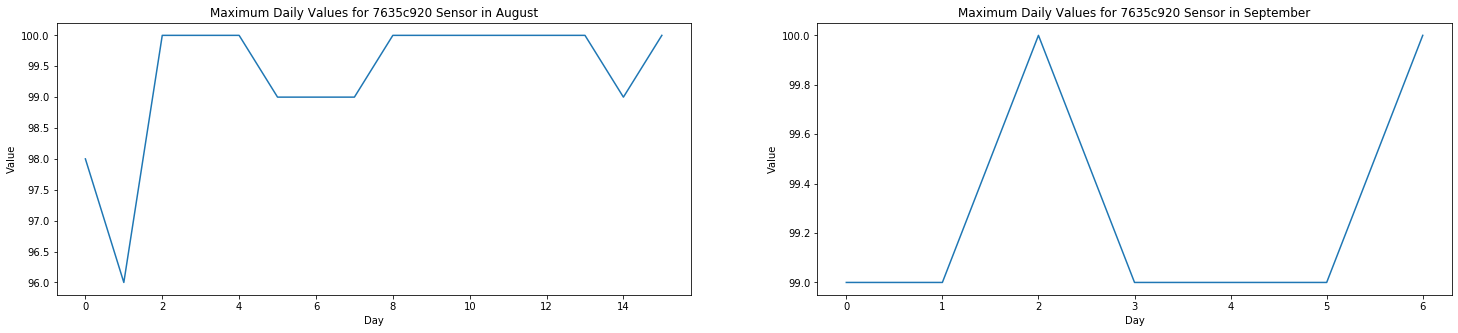

In [93]:
sensor2 = getgroup('7635c920-8679-11e6-a353-2f6c041e2491')
sensor2aug = groupget(sensor2,8)
sensor2sep = groupget(sensor2,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor2aug.index, y=sensor2aug.value)
plt.title('Maximum Daily Values for 7635c920 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor2sep.index, y=sensor2sep.value)
plt.title('Maximum Daily Values for 7635c920 Sensor in September')


Text(0.5, 1.0, &#39;Maximum Daily Values for 763b9580 Sensor in September&#39;)

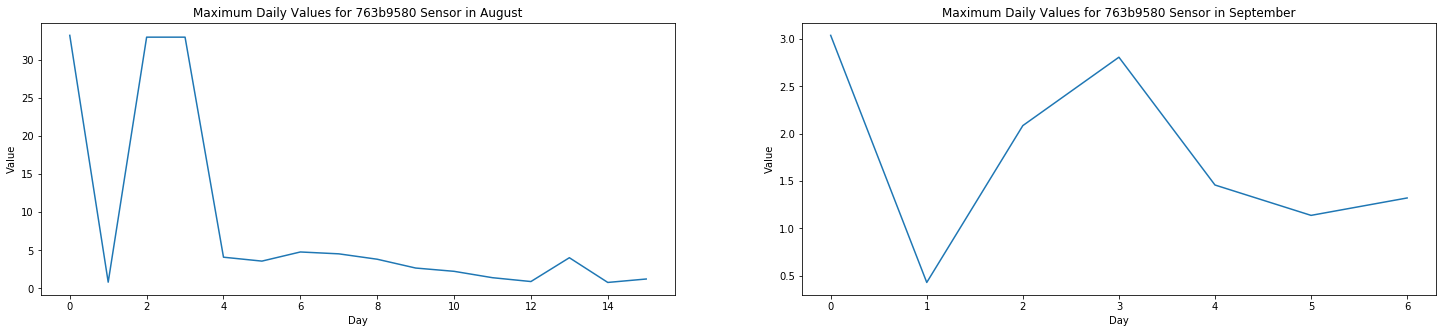

In [157]:
sensor3 = getgroup('763b9580-8679-11e6-a353-2f6c041e2491')
#sensor3jul = groupget(sensor3,7)
sensor3aug = groupget(sensor3,8)
sensor3sep = groupget(sensor3,9)
#sensor3oct = groupget(sensor3,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor3aug.index, y=sensor3aug.value)
plt.title('Maximum Daily Values for 763b9580 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor3sep.index, y=sensor3sep.value)
plt.title('Maximum Daily Values for 763b9580 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 763ca6f0 Sensor in September&#39;)

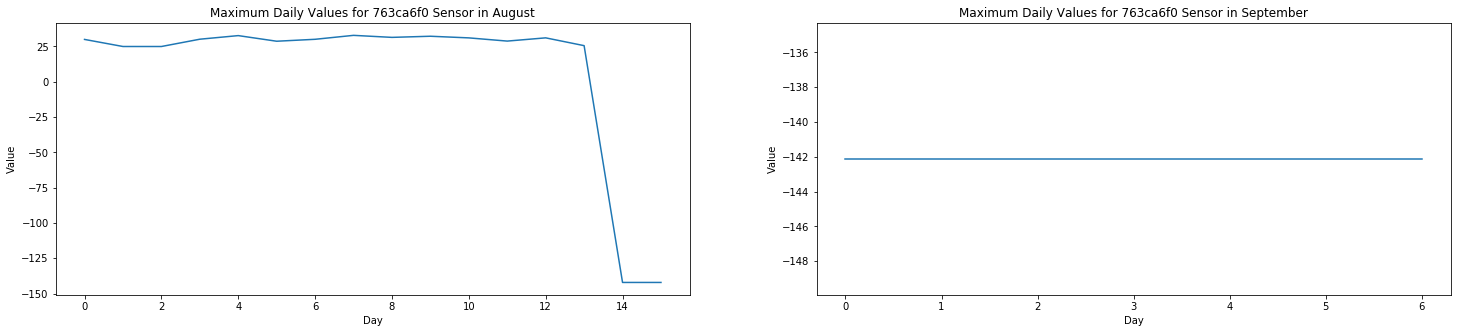

In [160]:
sensor4 = getgroup('763ca6f0-8679-11e6-a353-2f6c041e2491')
#sensor4jul = groupget(sensor4,7)
sensor4aug = groupget(sensor4,8)
sensor4sep = groupget(sensor4,9)
#sensor4oct = groupget(sensor4,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor4aug.index, y=sensor4aug.value)
plt.title('Maximum Daily Values for 763ca6f0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor4sep.index, y=sensor4sep.value)
plt.title('Maximum Daily Values for 763ca6f0 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 763d9150 Sensor in September&#39;)

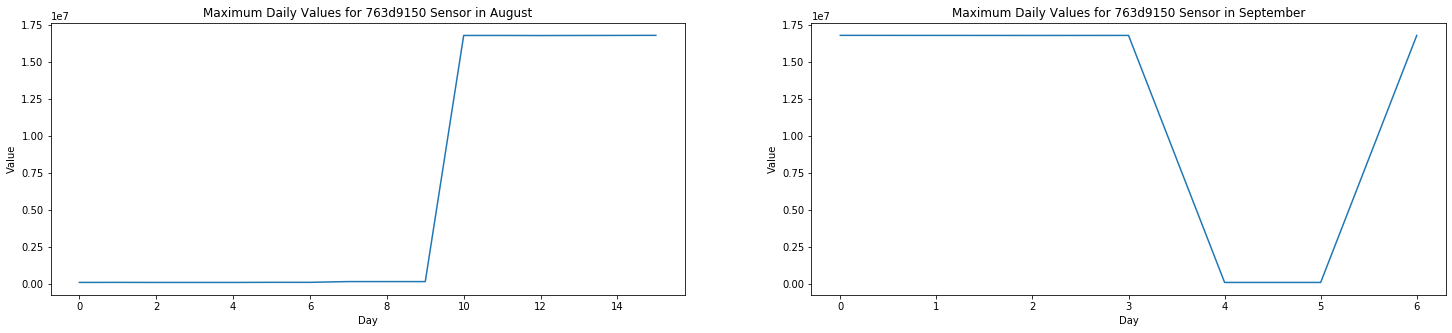

In [163]:
sensor5 = getgroup('763d9150-8679-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor5aug = groupget(sensor5,8)
sensor5sep = groupget(sensor5,9)
#sensor5oct = groupget(sensor5,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor5aug.index, y=sensor5aug.value)
plt.title('Maximum Daily Values for 763d9150 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor5sep.index, y=sensor5sep.value)
plt.title('Maximum Daily Values for 763d9150 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 7636da90 Sensor in October&#39;)

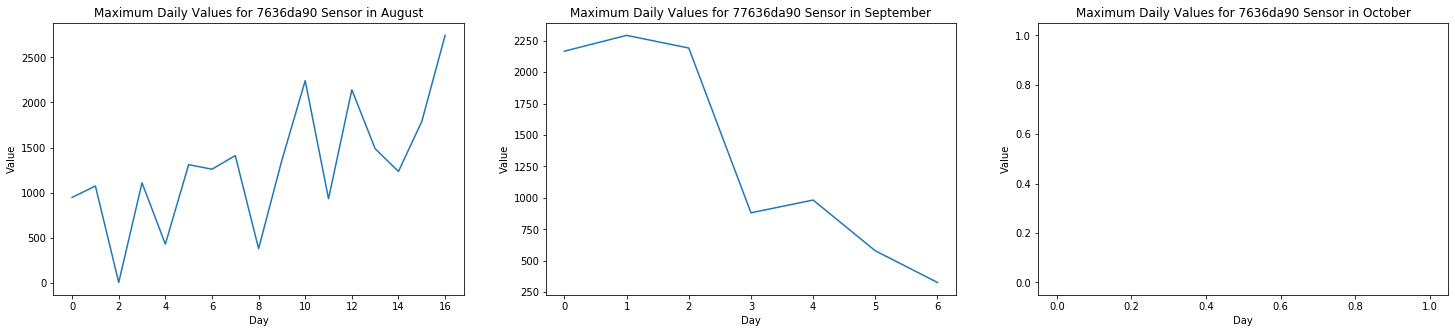

In [167]:
sensor6 = getgroup('7636da90-8679-11e6-a353-2f6c041e2491')
#sensor6jul = groupget(sensor6,7)
sensor6aug = groupget(sensor6,8)
sensor6sep = groupget(sensor6,9)
sensor6oct = groupget(sensor6,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor6aug.index, y=sensor6aug.value)
plt.title('Maximum Daily Values for 7636da90 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor6sep.index, y=sensor6sep.value)
plt.title('Maximum Daily Values for 77636da90 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor6oct.index, y=sensor6oct.value)
plt.title('Maximum Daily Values for 7636da90 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for 76413ad0 Sensor in September&#39;)

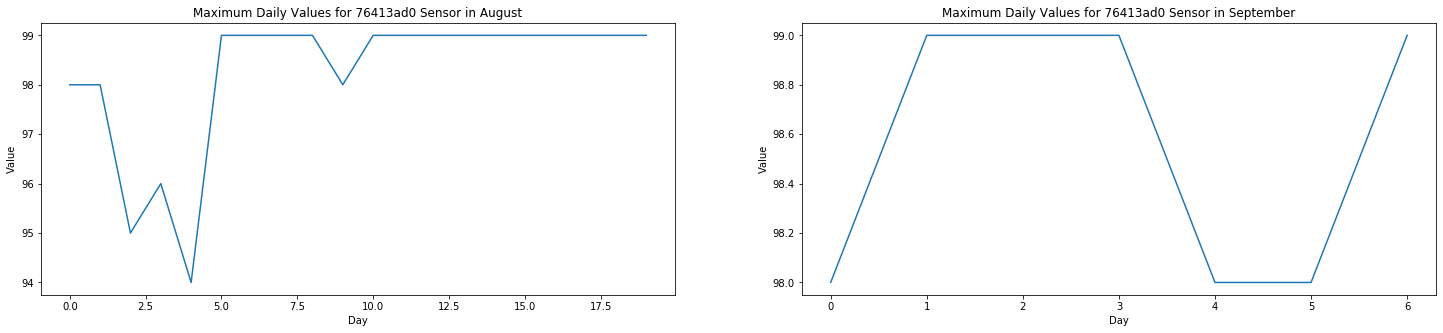

In [170]:
sensor7 = getgroup('76413ad0-8679-11e6-a353-2f6c041e2491')
#sensor7jul = groupget(sensor7,7)
sensor7aug = groupget(sensor7,8)
sensor7sep = groupget(sensor7,9)
#sensor7oct = groupget(sensor7,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor7aug.index, y=sensor7aug.value)
plt.title('Maximum Daily Values for 76413ad0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor7sep.index, y=sensor7sep.value)
plt.title('Maximum Daily Values for 76413ad0 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 764161e0 Sensor in September&#39;)

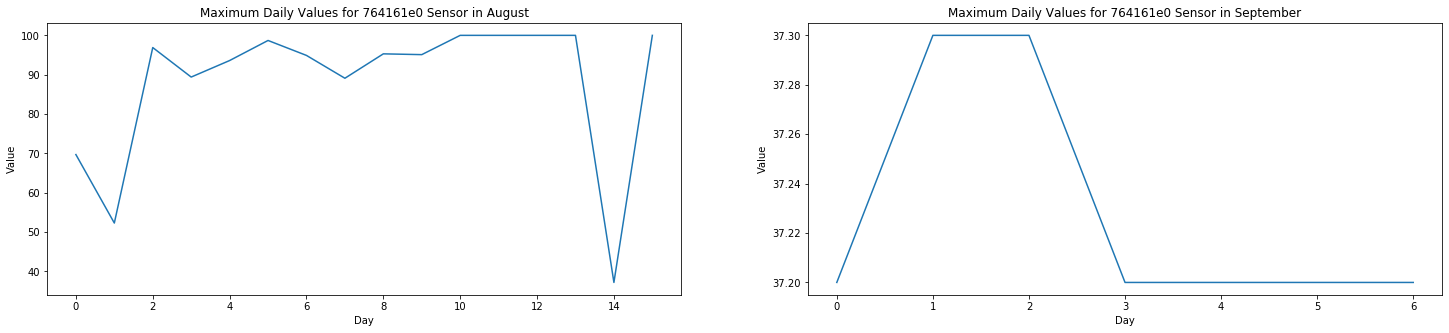

In [175]:
sensor8 = getgroup('764161e0-8679-11e6-a353-2f6c041e2491')
#sensor8jul = groupget(sensor8,7)
sensor8aug = groupget(sensor8,8)
sensor8sep = groupget(sensor8,9)
#sensor8oct = groupget(sensor8,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor8aug.index, y=sensor8aug.value)
plt.title('Maximum Daily Values for 764161e0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor8sep.index, y=sensor8sep.value)
plt.title('Maximum Daily Values for 764161e0 Sensor in September')


Text(0.5, 1.0, &#39;Maximum Daily Values for c5e685d0 Sensor in August&#39;)

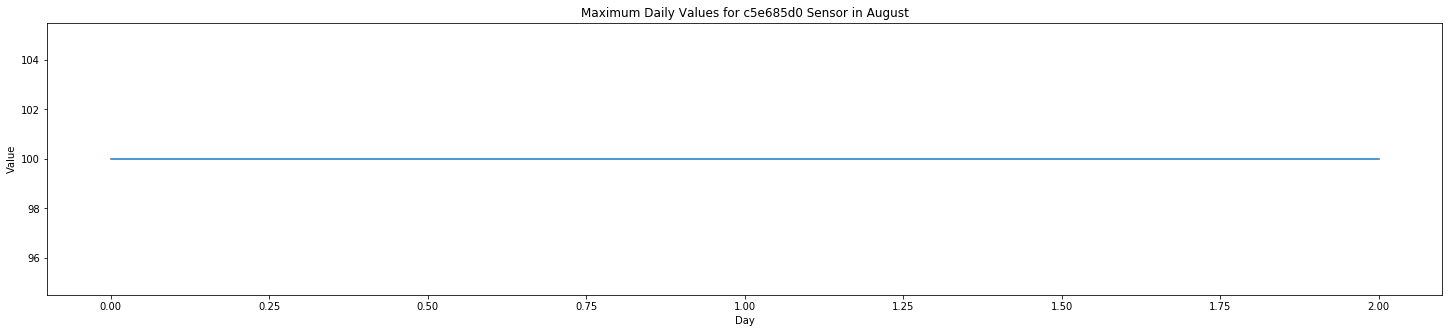

In [180]:
sensor9 = getgroup('c5e685d0-867a-11e6-a353-2f6c041e2491')
#sensor9jul = groupget(sensor9,7)
sensor9aug = groupget(sensor9,8)
#sensor9sep = groupget(sensor9,9)
#sensor9oct = groupget(sensor9,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor9aug.index, y=sensor9aug.value)
plt.title('Maximum Daily Values for c5e685d0 Sensor in August')


Text(0.5, 1.0, &#39;Maximum Daily Values for c5e9ba20 Sensor in August&#39;)

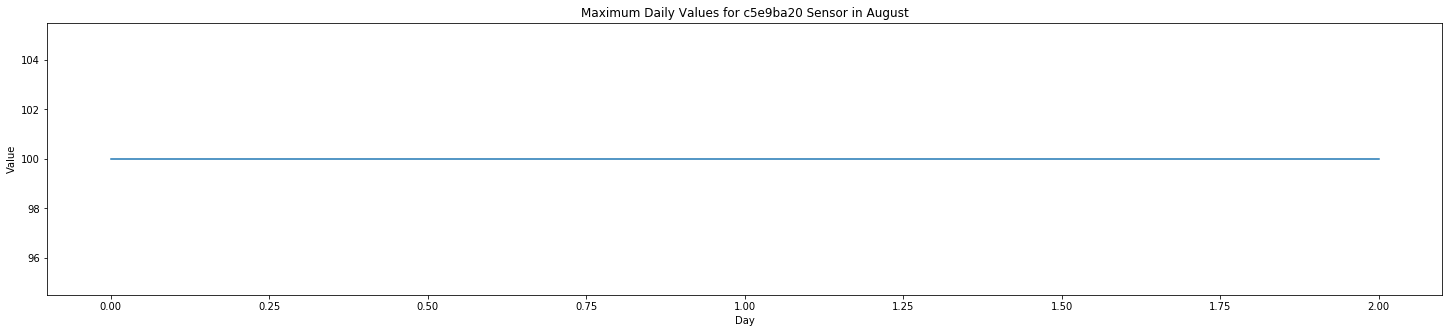

In [185]:
sensor10 = getgroup('c5e9ba20-867a-11e6-a353-2f6c041e2491')
#sensor10jul = groupget(sensor10,7)
sensor10aug = groupget(sensor10,8)
#sensor10sep = groupget(sensor10,9)
#sensor10oct = groupget(sensor10,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor10aug.index, y=sensor10aug.value)
plt.title('Maximum Daily Values for c5e9ba20 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c159c730 Sensor in August&#39;)

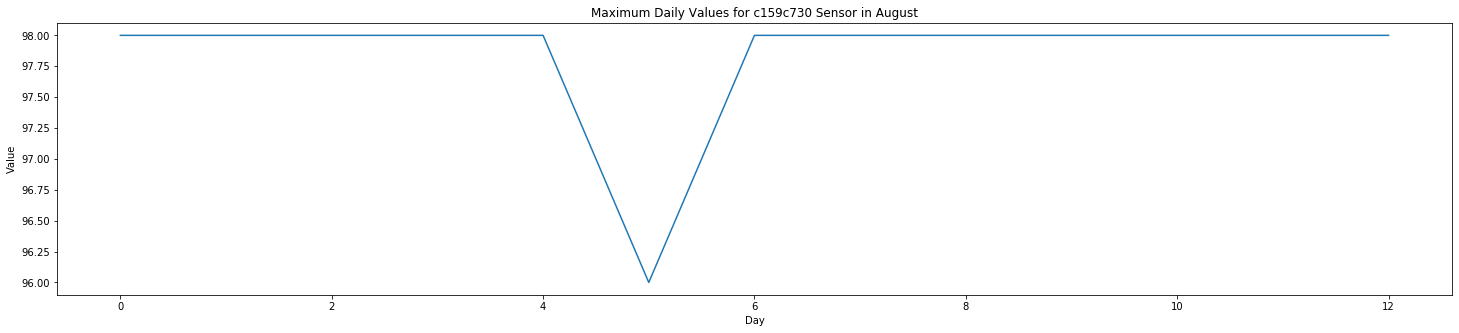

In [189]:
sensor11 = getgroup('c159c730-8679-11e6-a353-2f6c041e2491')
#sensor11jul = groupget(sensor11,7)
sensor11aug = groupget(sensor11,8)
#sensor11sep = groupget(sensor11,9)
#sensor11oct = groupget(sensor11,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor11aug.index, y=sensor11aug.value)
plt.title('Maximum Daily Values for c159c730 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c159ee40 Sensor in August&#39;)

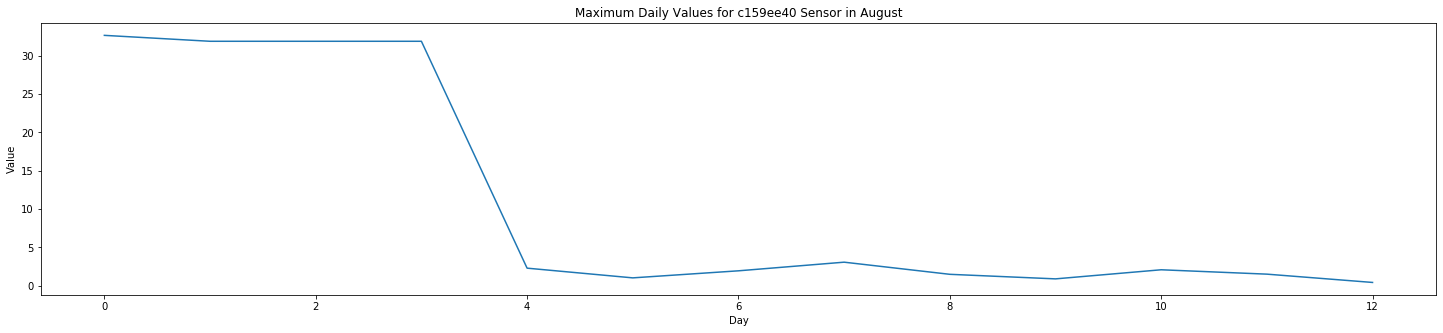

In [194]:
sensor12 = getgroup('c159ee40-8679-11e6-a353-2f6c041e2491')
#sensor12jul = groupget(sensor12,7)
sensor12aug = groupget(sensor12,8)
#sensor12sep = groupget(sensor12,9)
#sensor12oct = groupget(sensor12,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor12aug.index, y=sensor12aug.value)
plt.title('Maximum Daily Values for c159ee40 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c15a6371 Sensor in August&#39;)

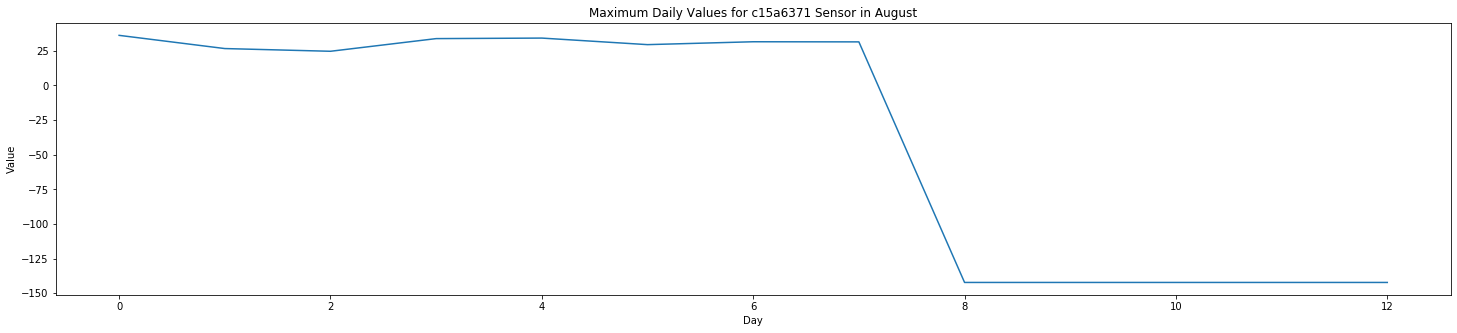

In [198]:
sensor13 = getgroup('c15a6371-8679-11e6-a353-2f6c041e2491')
#sensor13jul = groupget(sensor13,7)
sensor13aug = groupget(sensor13,8)
#sensor13sep = groupget(sensor13,9)
#sensor13oct = groupget(sensor13,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor13aug.index, y=sensor13aug.value)
plt.title('Maximum Daily Values for c15a6371 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c15a6372 Sensor in August&#39;)

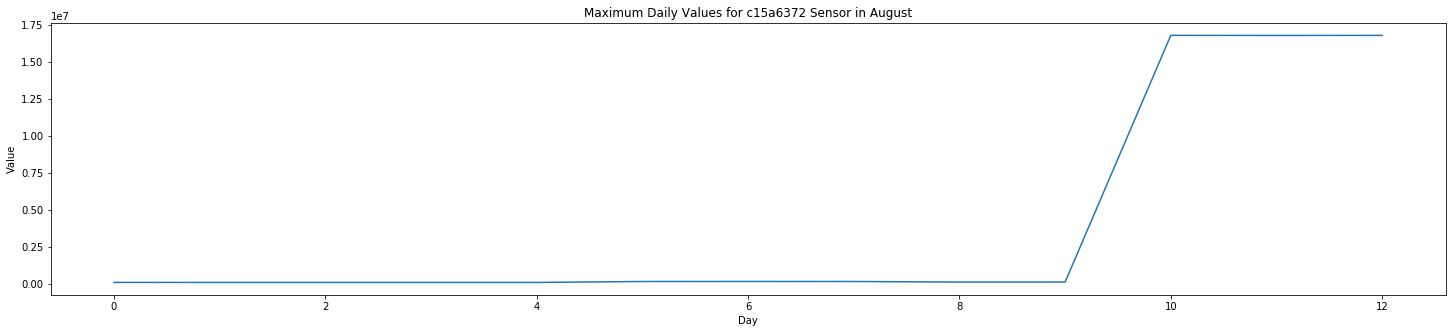

In [202]:
sensor14 = getgroup('c15a6372-8679-11e6-a353-2f6c041e2491')
#sensor14jul = groupget(sensor14,7)
sensor14aug = groupget(sensor14,8)
#sensor14sep = groupget(sensor14,9)
#sensor14oct = groupget(sensor14,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor14aug.index, y=sensor14aug.value)
plt.title('Maximum Daily Values for c15a6372 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c15c5f40 Sensor in August&#39;)

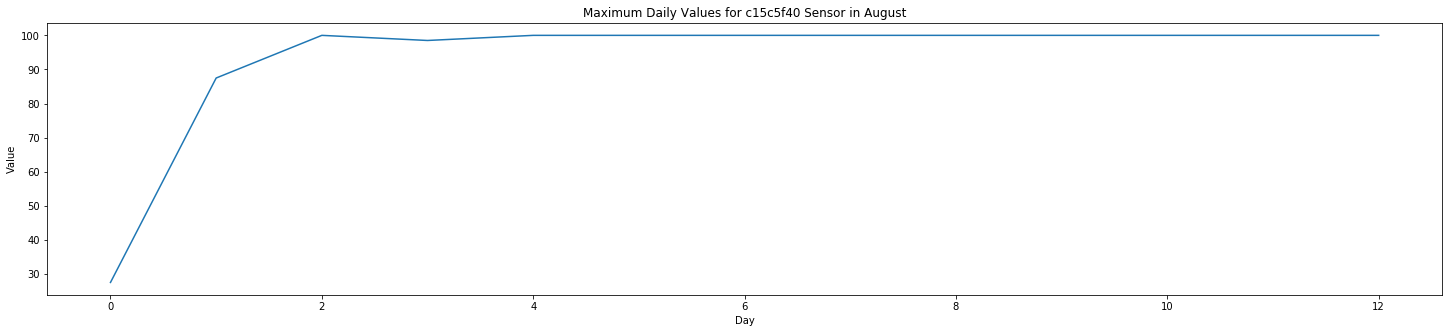

In [206]:
sensor15 = getgroup('c15c5f40-8679-11e6-a353-2f6c041e2491')
#sensor15jul = groupget(sensor15,7)
sensor15aug = groupget(sensor15,8)
#sensor15sep = groupget(sensor15,9)
#sensor15oct = groupget(sensor15,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor15aug.index, y=sensor15aug.value)
plt.title('Maximum Daily Values for c15c5f40 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c15ef750 Sensor in August&#39;)

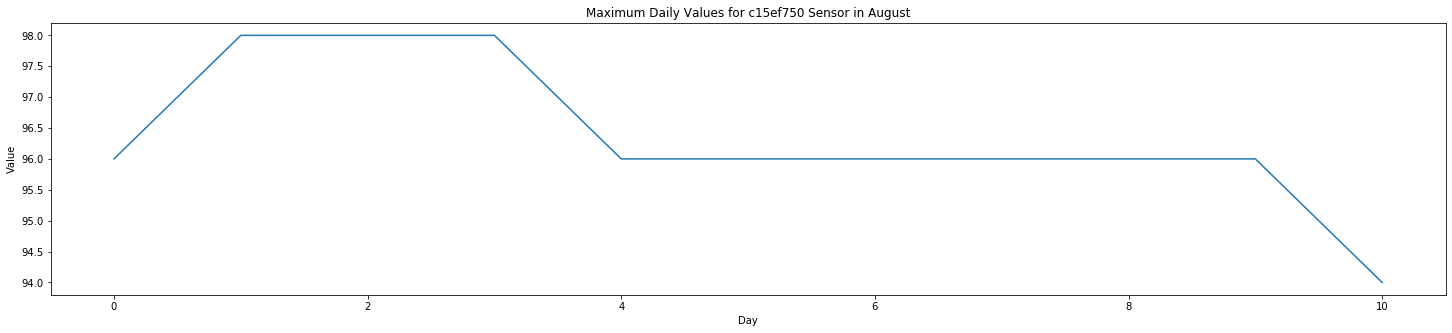

In [211]:
sensor16 = getgroup('c15ef750-8679-11e6-a353-2f6c041e2491')
#sensor16jul = groupget(sensor16,7)
sensor16aug = groupget(sensor16,8)
#sensor16sep = groupget(sensor16,9)
#sensor16oct = groupget(sensor16,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor16aug.index, y=sensor16aug.value)
plt.title('Maximum Daily Values for c15ef750 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for 76427350 Sensor in September&#39;)

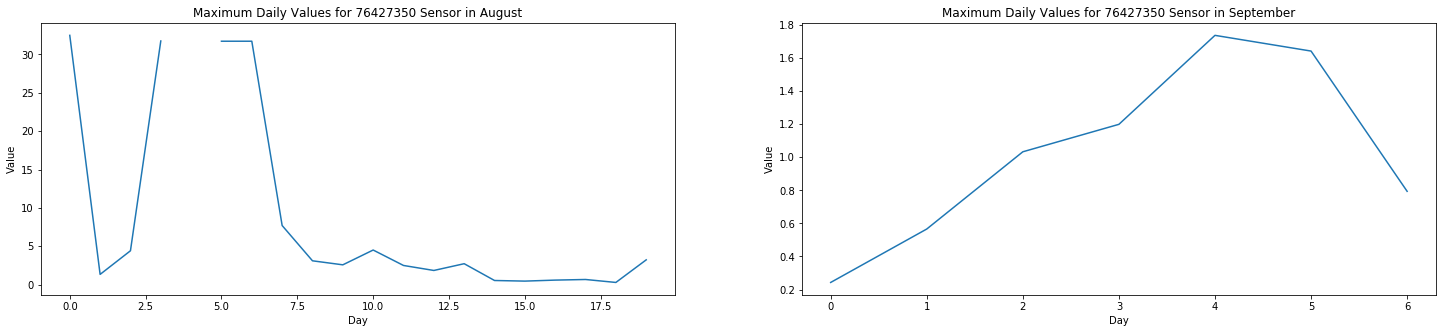

In [216]:
sensor17 = getgroup('76427350-8679-11e6-a353-2f6c041e2491')
#sensor17jul = groupget(sensor17,7)
sensor17aug = groupget(sensor17,8)
sensor17sep = groupget(sensor17,9)
#sensor17oct = groupget(sensor17,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor17aug.index, y=sensor17aug.value)
plt.title('Maximum Daily Values for 76427350 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor17sep.index, y=sensor17sep.value)
plt.title('Maximum Daily Values for 76427350 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 76427351 Sensor in September&#39;)

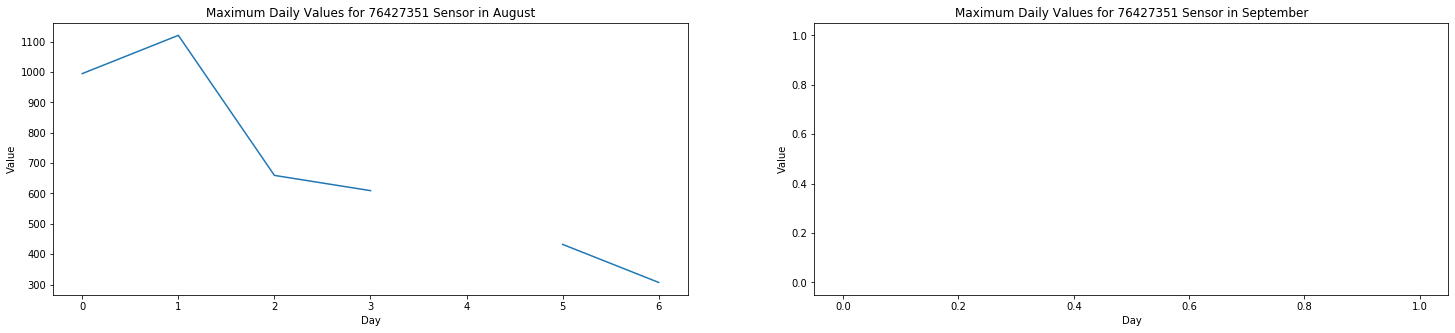

In [219]:
sensor18 = getgroup('76427351-8679-11e6-a353-2f6c041e2491')
#sensor18jul = groupget(sensor18,7)
sensor18aug = groupget(sensor18,8)
sensor18sep = groupget(sensor18,9)
#sensor18oct = groupget(sensor18,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor18aug.index, y=sensor18aug.value)
plt.title('Maximum Daily Values for 76427351 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor18sep.index, y=sensor18sep.value)
plt.title('Maximum Daily Values for 76427351 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 76427351 Sensor in September&#39;)

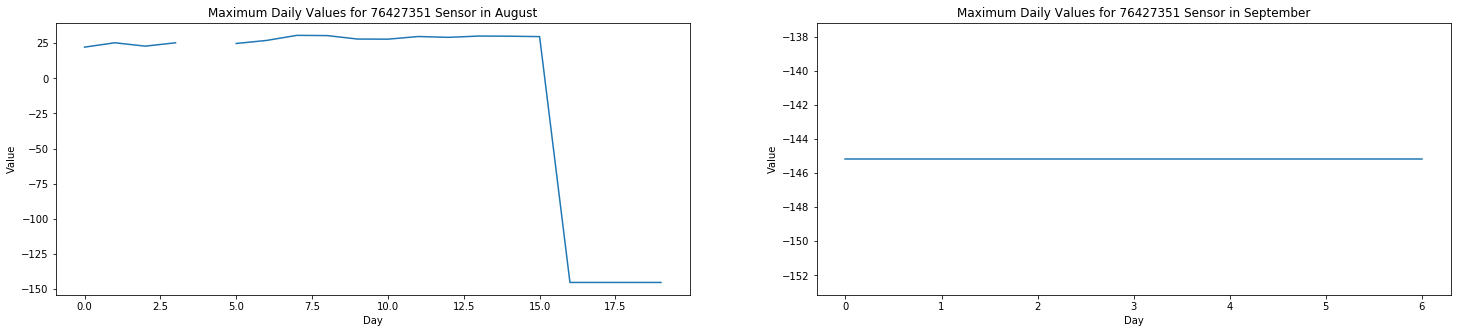

In [223]:
sensor19 = getgroup('7644bd40-8679-11e6-a353-2f6c041e2491')
#sensor18jul = groupget(sensor18,7)
sensor19aug = groupget(sensor19,8)
sensor19sep = groupget(sensor19,9)
#sensor18oct = groupget(sensor18,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor19aug.index, y=sensor19aug.value)
plt.title('Maximum Daily Values for 76427351 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor19sep.index, y=sensor19sep.value)
plt.title('Maximum Daily Values for 76427351 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 7645ceb0 Sensor in September&#39;)

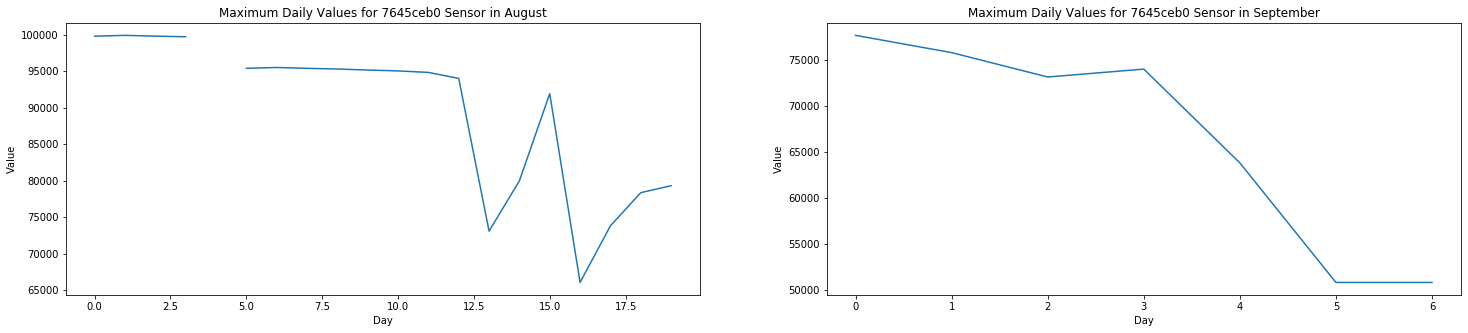

In [228]:
sensor20 = getgroup('7645ceb0-8679-11e6-a353-2f6c041e2491')
#sensor20jul = groupget(sensor20,7)
sensor20aug = groupget(sensor20,8)
sensor20sep = groupget(sensor20,9)
#sensor20oct = groupget(sensor20,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor20aug.index, y=sensor20aug.value)
plt.title('Maximum Daily Values for 7645ceb0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor20sep.index, y=sensor20sep.value)
plt.title('Maximum Daily Values for 7645ceb0 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 7645ceb1 Sensor in September&#39;)

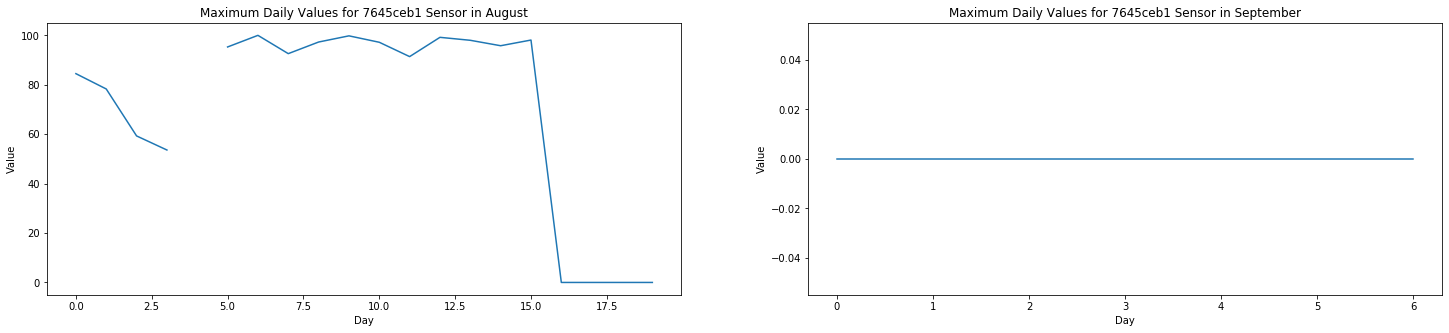

In [238]:
sensor21 = getgroup('7645ceb1-8679-11e6-a353-2f6c041e2491')
#sensor20jul = groupget(sensor20,7)
sensor21aug = groupget(sensor21,8)
sensor21sep = groupget(sensor21,9)
#sensor20oct = groupget(sensor20,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor21aug.index, y=sensor21aug.value)
plt.title('Maximum Daily Values for 7645ceb1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor21sep.index, y=sensor21sep.value)
plt.title('Maximum Daily Values for 7645ceb1 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for 763701a1 Sensor in September&#39;)

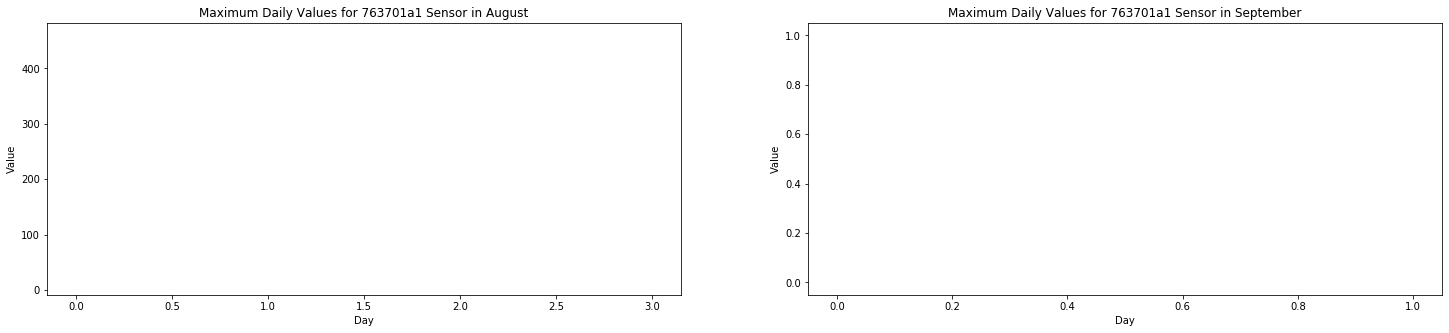

In [237]:
sensor22 = getgroup('763701a1-8679-11e6-a353-2f6c041e2491')
#sensor22jul = groupget(sensor22,7)
sensor22aug = groupget(sensor22,8)
sensor22sep = groupget(sensor22,9)
#sensor22oct = groupget(sensor22,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor22aug.index, y=sensor22aug.value)
plt.title('Maximum Daily Values for 763701a1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor22sep.index, y=sensor22sep.value)
plt.title('Maximum Daily Values for 763701a1 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for c15f9391 Sensor in August&#39;)

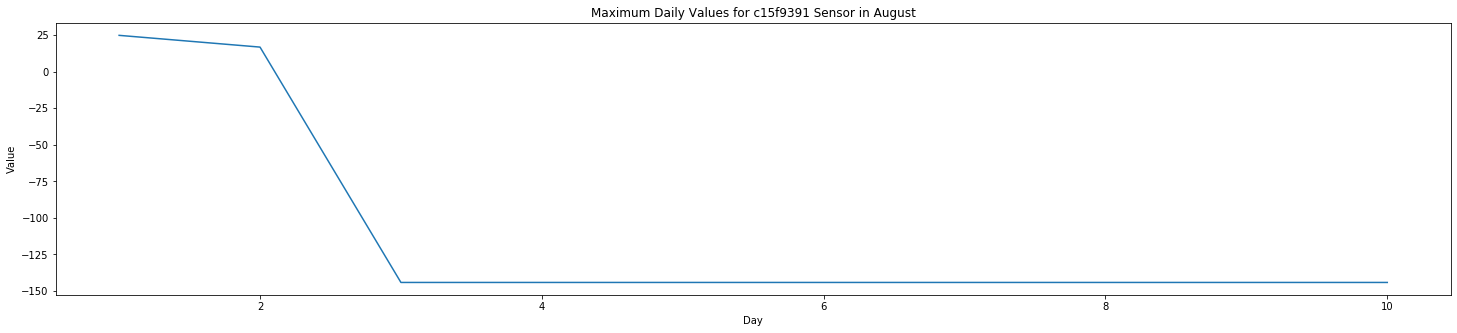

In [242]:
sensor23 = getgroup('c15f9391-8679-11e6-a353-2f6c041e2491')
#sensor22jul = groupget(sensor22,7)
sensor23aug = groupget(sensor23,8)
#sensor23sep = groupget(sensor23,9)
#sensor22oct = groupget(sensor22,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor23aug.index, y=sensor23aug.value)
plt.title('Maximum Daily Values for c15f9391 Sensor in August')


Text(0.5, 1.0, &#39;Maximum Daily Values for c162c7e0 Sensor in August&#39;)

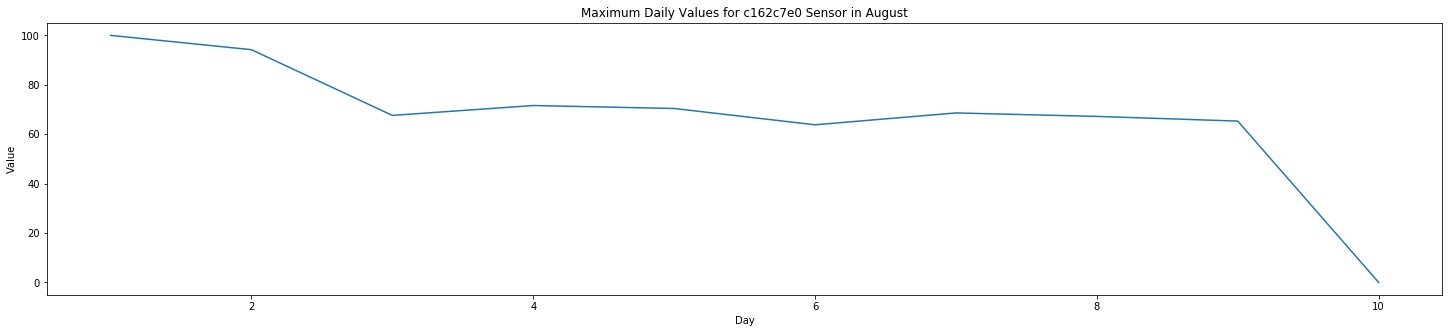

In [248]:
sensor24 = getgroup('c162c7e0-8679-11e6-a353-2f6c041e2491')
#sensor24jul = groupget(sensor24,7)
sensor24aug = groupget(sensor24,8)
#sensor24sep = groupget(sensor24,9)
#sensor24oct = groupget(sensor24,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor24aug.index, y=sensor24aug.value)
plt.title('Maximum Daily Values for c162c7e0 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c15f9390 Sensor in August&#39;)

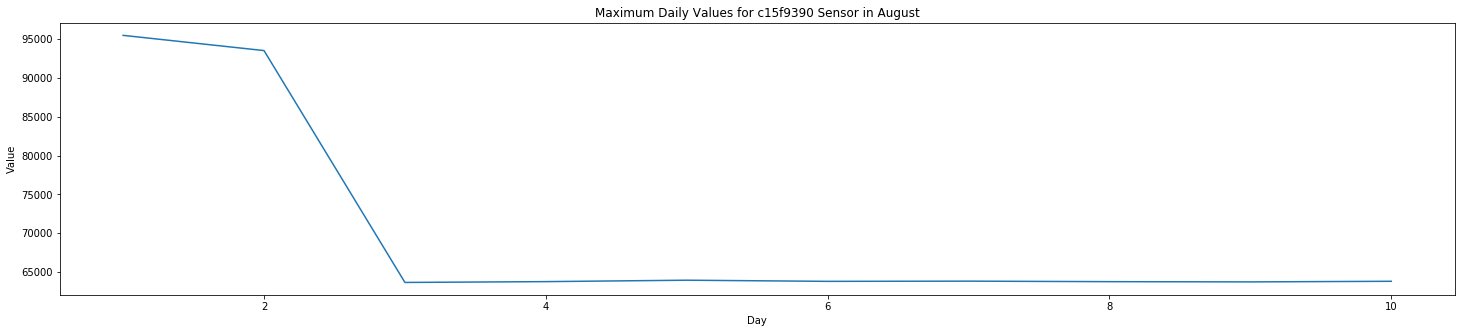

In [254]:
sensor25 = getgroup('c15f9390-8679-11e6-a353-2f6c041e2491')
#sensor25jul = groupget(sensor25,7)
sensor25aug = groupget(sensor25,8)
#sensor24sep = groupget(sensor24,9)
#sensor24oct = groupget(sensor24,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor25aug.index, y=sensor25aug.value)
plt.title('Maximum Daily Values for c15f9390 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c15fbaa0 Sensor in August&#39;)

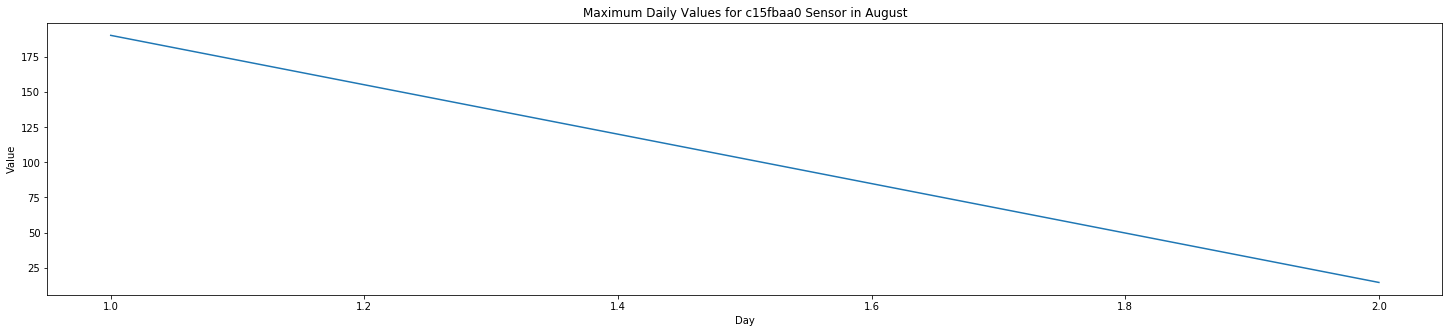

In [259]:
sensor26 = getgroup('c15fbaa0-8679-11e6-a353-2f6c041e2491')
#sensor26jul = groupget(sensor26,7)
sensor26aug = groupget(sensor26,8)
#sensor26sep = groupget(sensor26,9)
#sensor26oct = groupget(sensor26,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor26aug.index, y=sensor26aug.value)
plt.title('Maximum Daily Values for c15fbaa0 Sensor in August')


Text(0.5, 1.0, &#39;Maximum Daily Values for c15fbaa1 Sensor in August&#39;)

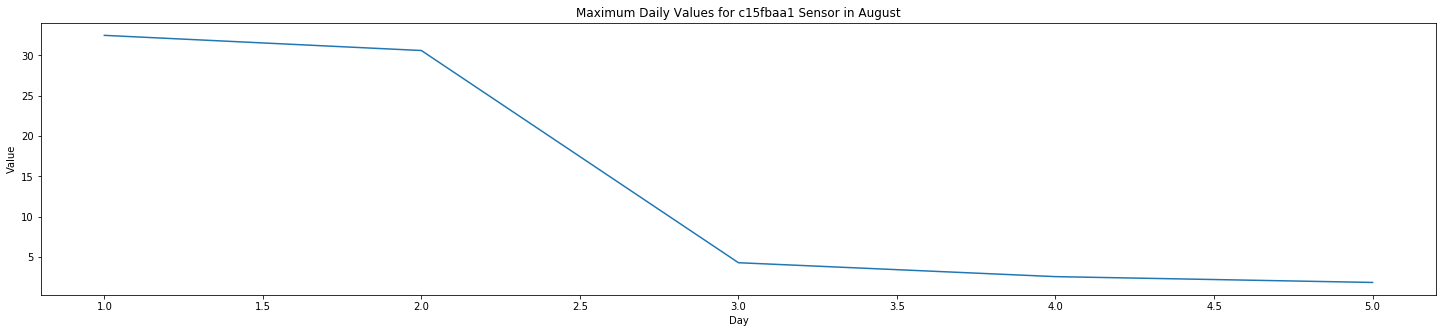

In [263]:
sensor27 = getgroup('c15fbaa1-8679-11e6-a353-2f6c041e2491')
#sensor27jul = groupget(sensor26,7)
sensor27aug = groupget(sensor27,8)
#sensor27sep = groupget(sensor27,9)
#sensor27oct = groupget(sensor27,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor27aug.index, y=sensor27aug.value)
plt.title('Maximum Daily Values for c15fbaa1 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for 763701a0 Sensor in October&#39;)

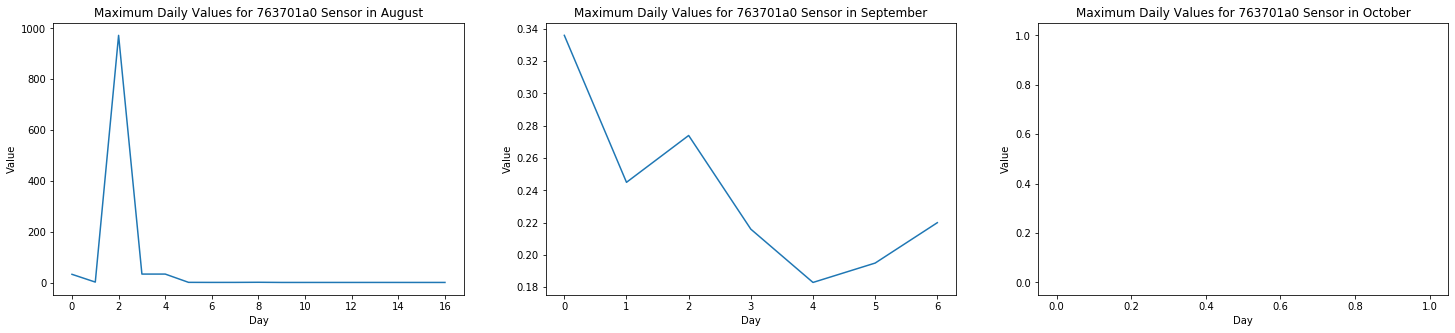

In [190]:
sensor28 = getgroup('763701a0-8679-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor28aug = groupget(sensor28,8)
sensor28sep = groupget(sensor28,9)
sensor28oct = groupget(sensor28,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor28aug.index, y=sensor28aug.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor28sep.index, y=sensor28sep.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor28oct.index, y=sensor28oct.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3cea980 Sensor in October&#39;)

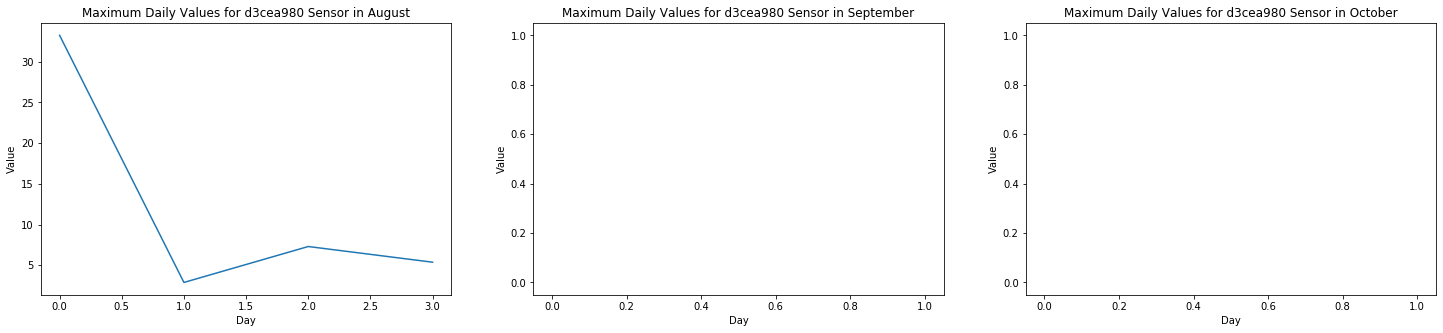

In [266]:
sensor29 = getgroup('d3cea980-8679-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor29aug = groupget(sensor29,8)
sensor29sep = groupget(sensor29,9)
sensor29oct = groupget(sensor29,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor29aug.index, y=sensor29aug.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor29sep.index, y=sensor29sep.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor29oct.index, y=sensor29oct.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for 763bbc90 Sensor in October&#39;)

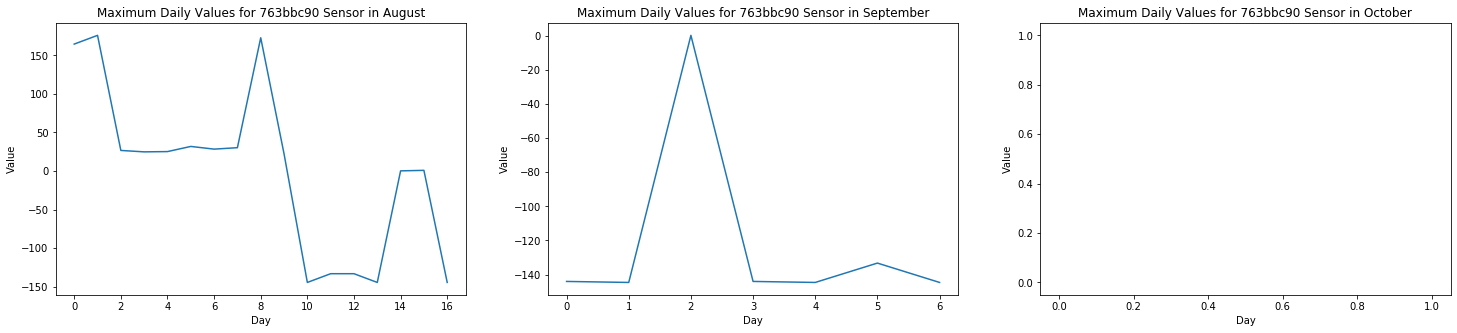

In [268]:
sensor30 = getgroup('763bbc90-8679-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor30aug = groupget(sensor30,8)
sensor30sep = groupget(sensor30,9)
sensor30oct = groupget(sensor30,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor30aug.index, y=sensor30aug.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor30sep.index, y=sensor30sep.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor30oct.index, y=sensor30oct.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for 763d6a40 Sensor in October&#39;)

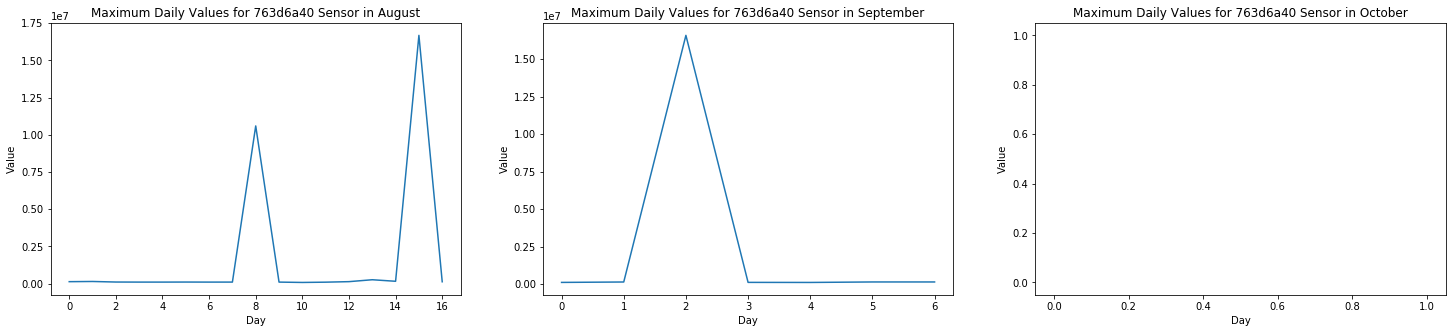

In [271]:
sensor31 = getgroup('763d6a40-8679-11e6-a353-2f6c041e2491')
#sensor31jul = groupget(sensor31,7)
sensor31aug = groupget(sensor31,8)
sensor31sep = groupget(sensor31,9)
sensor31oct = groupget(sensor31,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor31aug.index, y=sensor31aug.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor31sep.index, y=sensor31sep.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor31oct.index, y=sensor31oct.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for 76402960 Sensor in October&#39;)

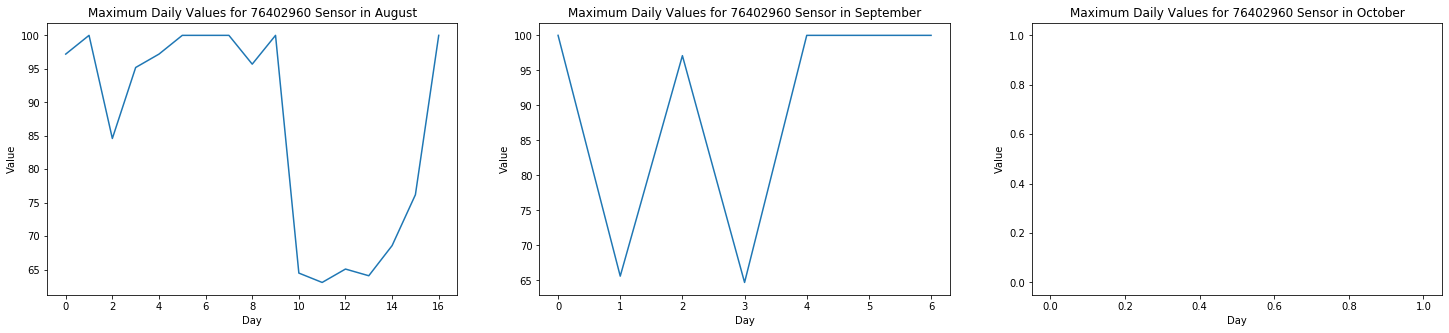

In [273]:
sensor32 = getgroup('76402960-8679-11e6-a353-2f6c041e2491')
#sensor31jul = groupget(sensor31,7)
sensor32aug = groupget(sensor32,8)
sensor32sep = groupget(sensor32,9)
sensor32oct = groupget(sensor32,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor32aug.index, y=sensor32aug.value)
plt.title('Maximum Daily Values for 76402960 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor32sep.index, y=sensor32sep.value)
plt.title('Maximum Daily Values for 76402960 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor32oct.index, y=sensor32oct.value)
plt.title('Maximum Daily Values for 76402960 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3cf6cd0 Sensor in October&#39;)

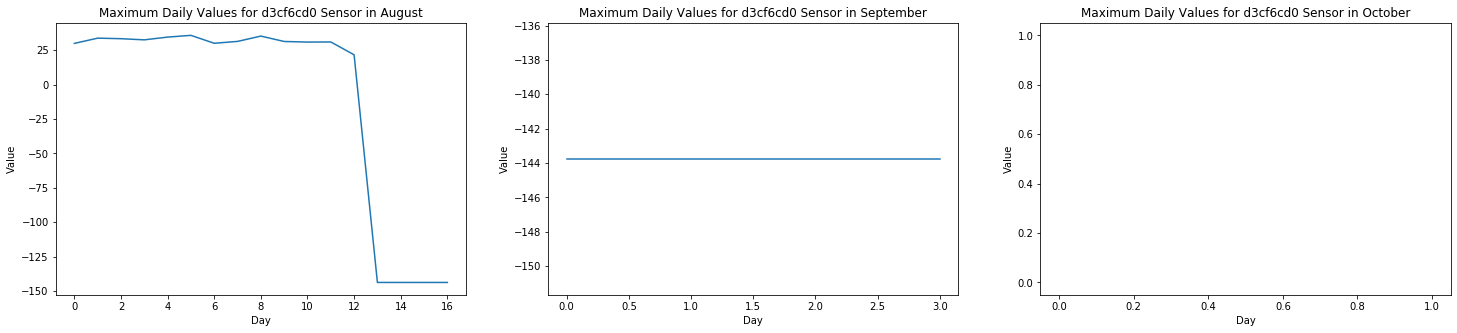

In [277]:
sensor33 = getgroup('d3cf6cd0-8679-11e6-a353-2f6c041e2491')
#sensor33jul = groupget(sensor33,7)
sensor33aug = groupget(sensor33,8)
sensor33sep = groupget(sensor33,9)
sensor33oct = groupget(sensor33,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor33aug.index, y=sensor33aug.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor33sep.index, y=sensor33sep.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor33oct.index, y=sensor33oct.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3cd7100 Sensor in October&#39;)

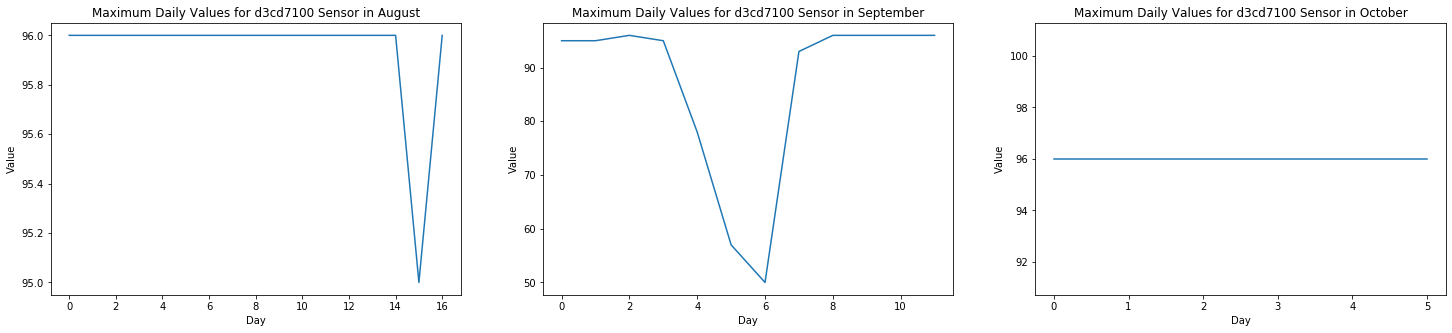

In [280]:
sensor34 = getgroup('d3cd7100-8679-11e6-a353-2f6c041e2491')
#sensor34jul = groupget(sensor34,7)
sensor34aug = groupget(sensor34,8)
sensor34sep = groupget(sensor34,9)
sensor34oct = groupget(sensor34,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor34aug.index, y=sensor34aug.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor34sep.index, y=sensor34sep.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor34oct.index, y=sensor34oct.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for 7635f030 Sensor in September&#39;)

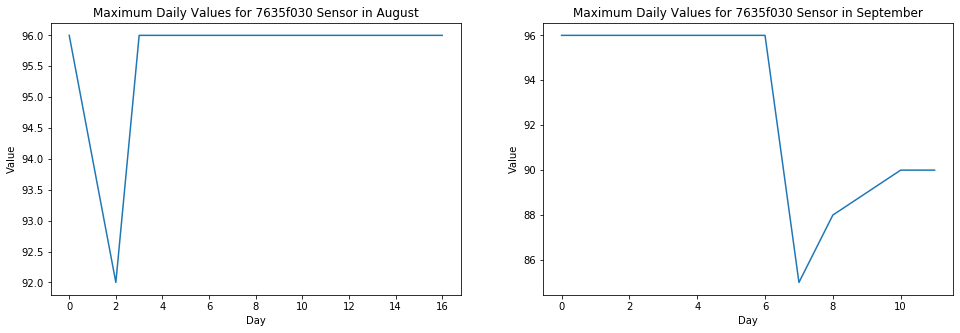

In [94]:
sensor35 = getgroup('7635f030-8679-11e6-a353-2f6c041e2491')
#sensor3jul = groupget(sensor3,7)
sensor35aug = groupget(sensor35,8)
sensor35sep = groupget(sensor35,9)
plt.figure(figsize=(25,5))
# plt.subplot(1,3,2)
# custom_plot(x=sensor3jul.index, y=sensor3jul.value)
# plt.title('Maximum Daily Values for 7635c920 Sensor in September')
plt.subplot(1,3,1)
custom_plot(x=sensor35aug.index, y=sensor35aug.value)
plt.title('Maximum Daily Values for 7635f030 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor35sep.index, y=sensor35sep.value)
plt.title('Maximum Daily Values for 7635f030 Sensor in September')


Text(0.5, 1.0, &#39;Maximum Daily Values for c5e80c70 Sensor in August&#39;)

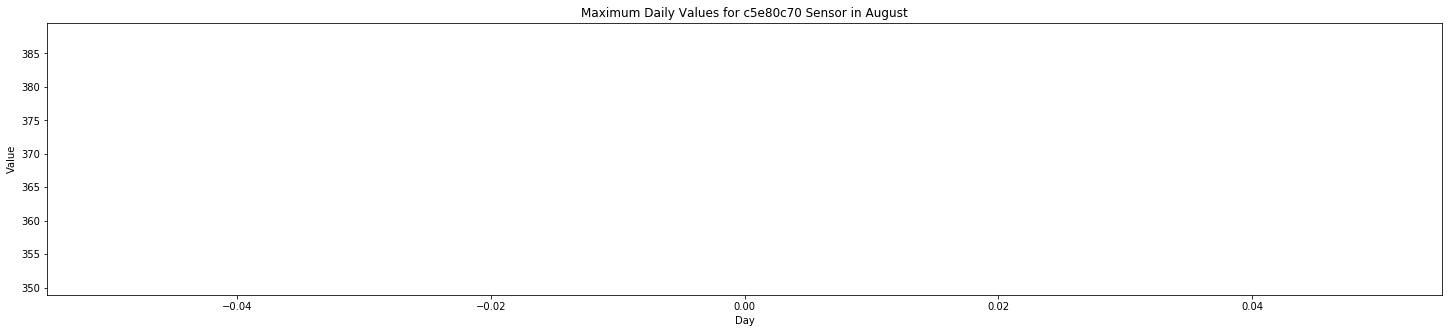

In [284]:
sensor36 = getgroup('c5e80c70-867a-11e6-a353-2f6c041e2491')
#sensor5jul = groupget(sensor5,7)
sensor36aug = groupget(sensor36,8)
#sensor36sep = groupget(sensor36,9)
#sensor36oct = groupget(sensor36,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor36aug.index, y=sensor36aug.value)
plt.title('Maximum Daily Values for c5e80c70 Sensor in August')


Text(0.5, 1.0, &#39;Maximum Daily Values for d3d909c1 Sensor in October&#39;)

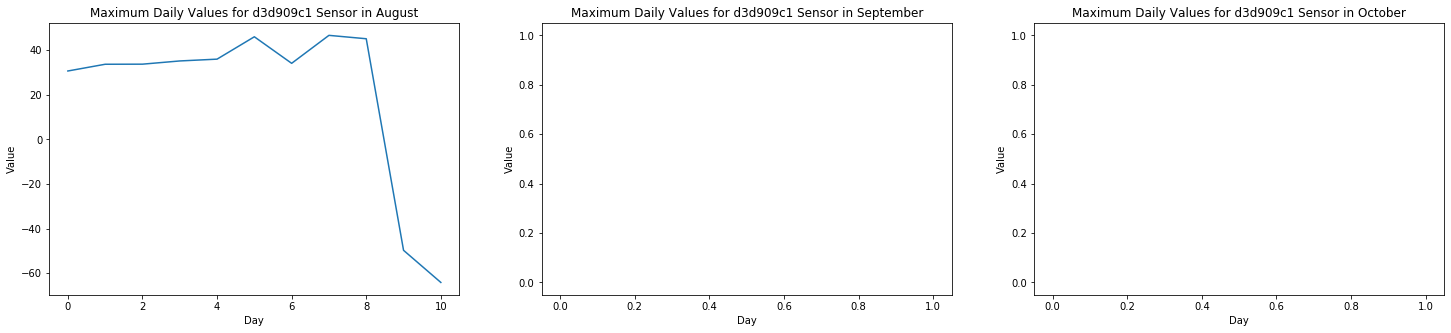

In [290]:
sensor37 = getgroup('d3d909c1-8679-11e6-a353-2f6c041e2491')
#sensor37jul = groupget(sensor37,7)
sensor37aug = groupget(sensor37,8)
sensor37sep = groupget(sensor37,9)
sensor37oct = groupget(sensor37,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor37aug.index, y=sensor37aug.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor37sep.index, y=sensor37sep.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor37oct.index, y=sensor37oct.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3cf45c0 Sensor in October&#39;)

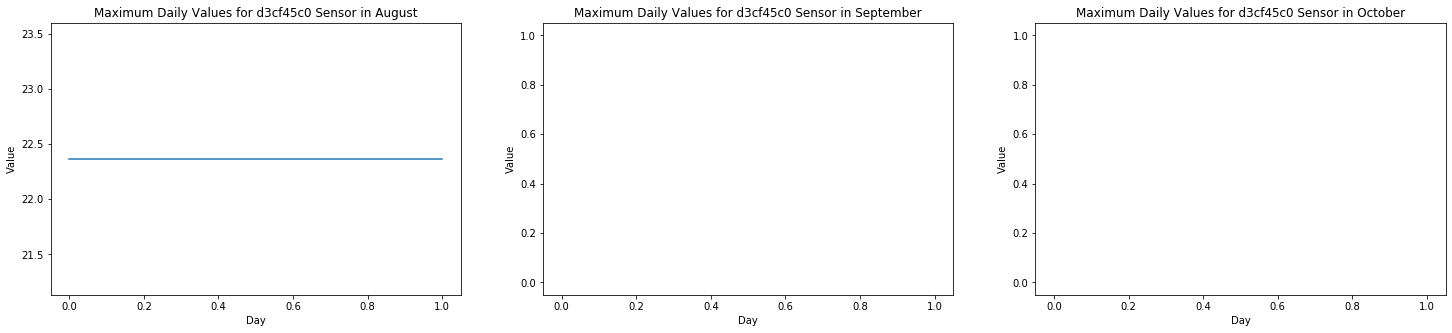

In [299]:
sensor38 = getgroup('d3cf45c0-8679-11e6-a353-2f6c041e2491')
#sensor37jul = groupget(sensor37,7)
sensor38aug = groupget(sensor38,8)
sensor38sep = groupget(sensor38,9)
sensor38oct = groupget(sensor38,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor38aug.index, y=sensor38aug.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor38sep.index, y=sensor38sep.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor38oct.index, y=sensor38oct.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3d0cc60 Sensor in October&#39;)

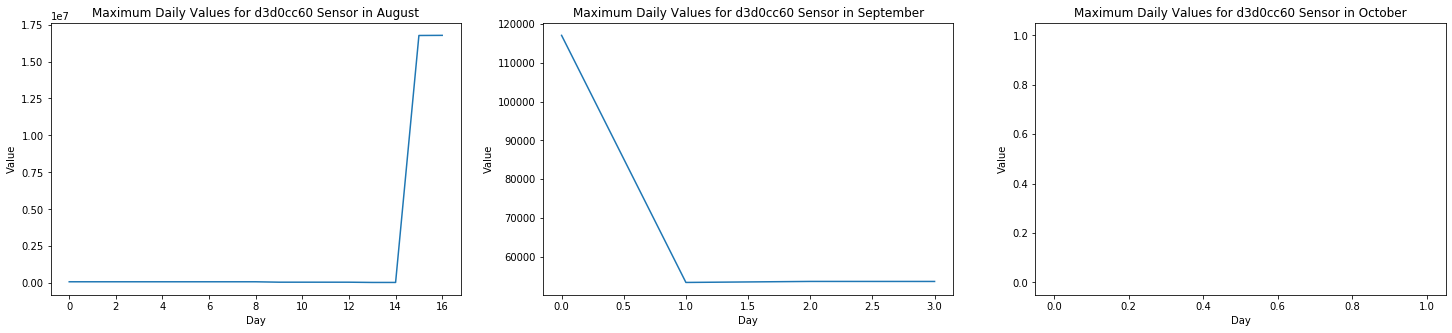

In [302]:
sensor39 = getgroup('d3d0cc60-8679-11e6-a353-2f6c041e2491')
#sensor39jul = groupget(sensor39,7)
sensor39aug = groupget(sensor39,8)
sensor39sep = groupget(sensor39,9)
sensor39oct = groupget(sensor39,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor39aug.index, y=sensor39aug.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor39sep.index, y=sensor39sep.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor39oct.index, y=sensor39oct.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3d56040 Sensor in October&#39;)

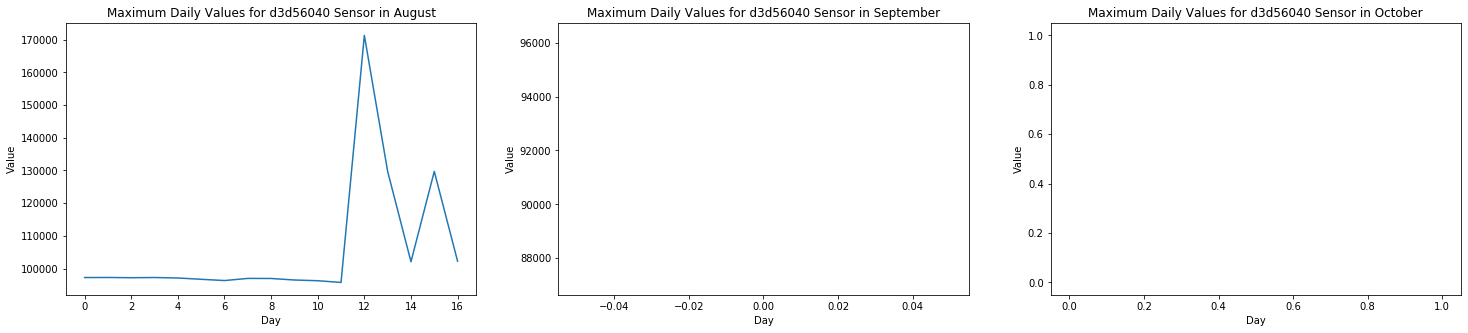

In [303]:
sensor40 = getgroup('d3d56040-8679-11e6-a353-2f6c041e2491')
#sensor39jul = groupget(sensor39,7)
sensor40aug = groupget(sensor40,8)
sensor40sep = groupget(sensor40,9)
sensor40oct = groupget(sensor40,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor40aug.index, y=sensor40aug.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor40sep.index, y=sensor40sep.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor40oct.index, y=sensor40oct.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for e66592c0 Sensor in September&#39;)

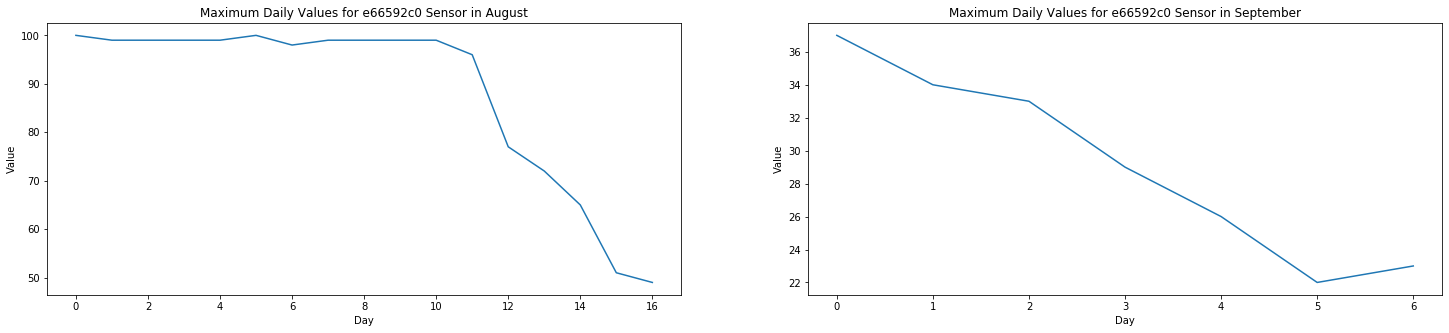

In [305]:
sensor41 = getgroup('e66592c0-8679-11e6-a353-2f6c041e2491')
#sensor39jul = groupget(sensor39,7)
sensor41aug = groupget(sensor41,8)
sensor41sep = groupget(sensor41,9)
#sensor41oct = groupget(sensor41,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor41aug.index, y=sensor41aug.value)
plt.title('Maximum Daily Values for e66592c0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor41sep.index, y=sensor41sep.value)
plt.title('Maximum Daily Values for e66592c0 Sensor in September')


Text(0.5, 1.0, &#39;Maximum Daily Values for e6691530 Sensor in September&#39;)

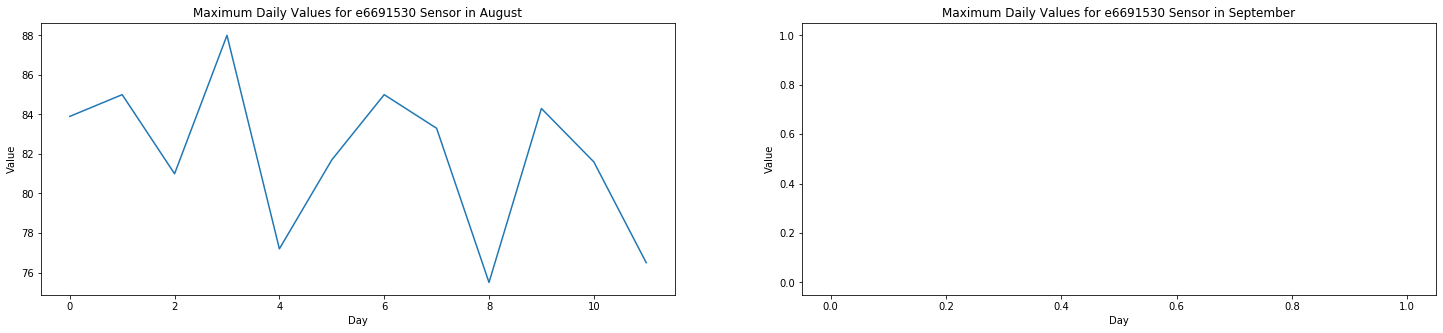

In [308]:
sensor42 = getgroup('e6691530-8679-11e6-a353-2f6c041e2491')
#sensor42jul = groupget(sensor42,7)
sensor42aug = groupget(sensor42,8)
sensor42sep = groupget(sensor42,9)
#sensor42oct = groupget(sensor42,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor42aug.index, y=sensor42aug.value)
plt.title('Maximum Daily Values for e6691530 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor42sep.index, y=sensor42sep.value)
plt.title('Maximum Daily Values for e6691530 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3d909c0 Sensor in October&#39;)

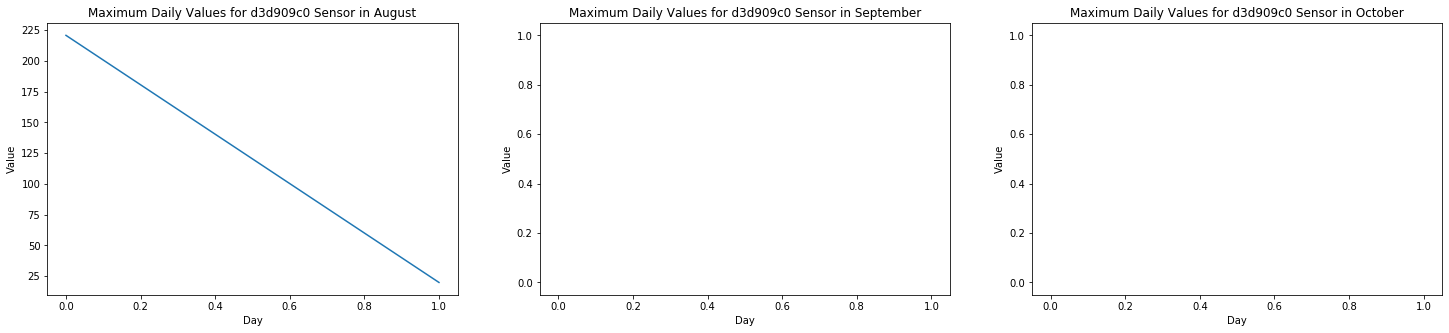

In [312]:
sensor43 = getgroup('d3d909c0-8679-11e6-a353-2f6c041e2491')
#sensor43jul = groupget(sensor43,7)
sensor43aug = groupget(sensor43,8)
sensor43sep = groupget(sensor43,9)
sensor43oct = groupget(sensor43,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor43aug.index, y=sensor43aug.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor43sep.index, y=sensor43sep.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor43oct.index, y=sensor43oct.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3d168a0 Sensor in October&#39;)

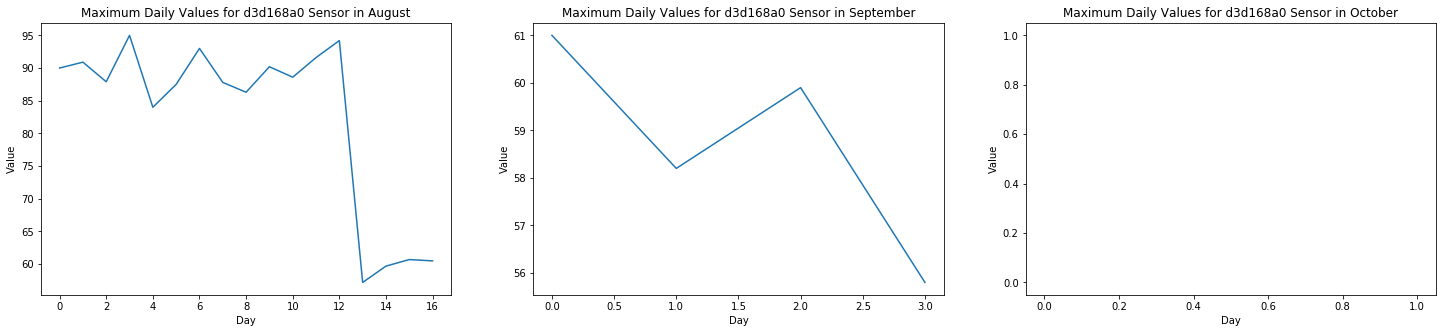

In [314]:
sensor44 = getgroup('d3d168a0-8679-11e6-a353-2f6c041e2491')
#sensor43jul = groupget(sensor43,7)
sensor44aug = groupget(sensor44,8)
sensor44sep = groupget(sensor44,9)
sensor44oct = groupget(sensor44,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor44aug.index, y=sensor44aug.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor44sep.index, y=sensor44sep.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor44oct.index, y=sensor44oct.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3d53930 Sensor in October&#39;)

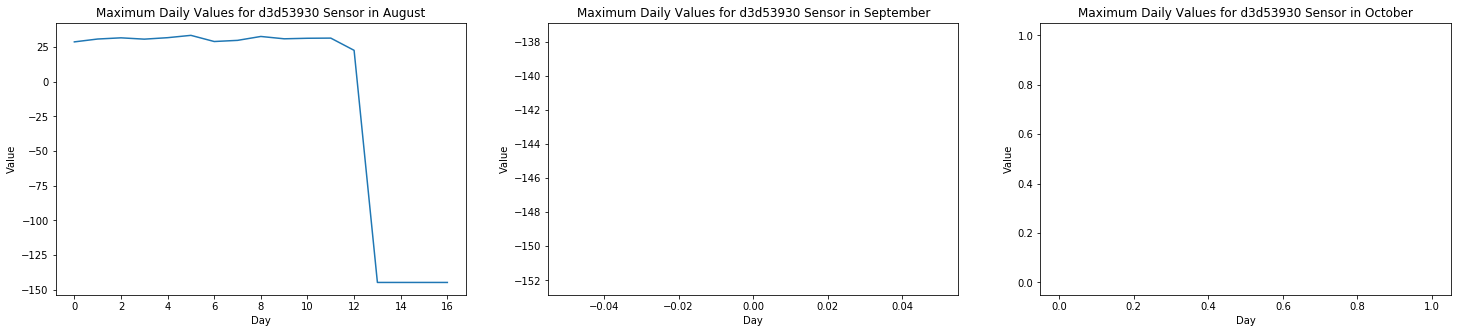

In [315]:
sensor45 = getgroup('d3d53930-8679-11e6-a353-2f6c041e2491')
#sensor43jul = groupget(sensor43,7)
sensor45aug = groupget(sensor45,8)
sensor45sep = groupget(sensor45,9)
sensor45oct = groupget(sensor45,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor45aug.index, y=sensor45aug.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor45sep.index, y=sensor45sep.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor45oct.index, y=sensor45oct.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in October')

Text(0.5, 1.0, &#39;Maximum Daily Values for e66851e1 Sensor in September&#39;)

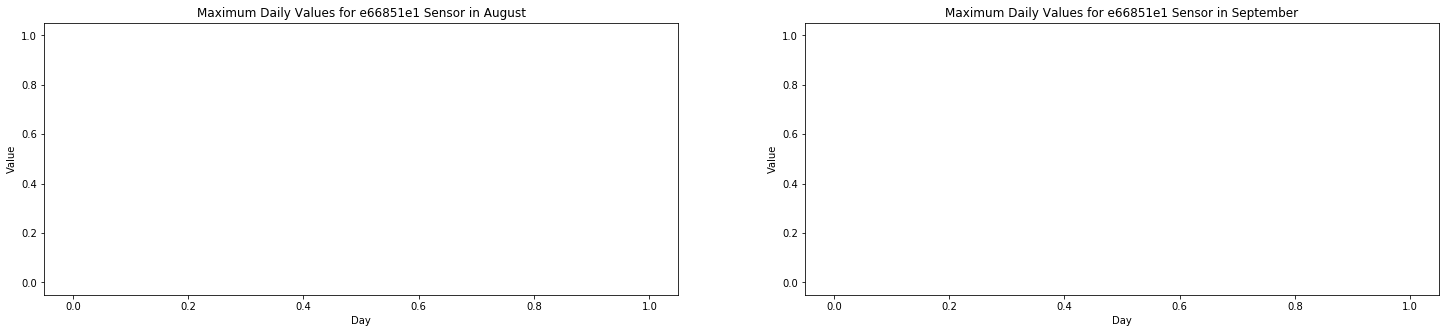

In [318]:
sensor46 = getgroup('e66851e1-8679-11e6-a353-2f6c041e2491')
#sensor46jul = groupget(sensor46,7)
sensor46aug = groupget(sensor46,8)
sensor46sep = groupget(sensor46,9)
#sensor46oct = groupget(sensor46,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor46aug.index, y=sensor46aug.value)
plt.title('Maximum Daily Values for e66851e1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor46sep.index, y=sensor46sep.value)
plt.title('Maximum Daily Values for e66851e1 Sensor in September')


Text(0.5, 1.0, &#39;Maximum Daily Values for c5e8a8b0 Sensor in August&#39;)

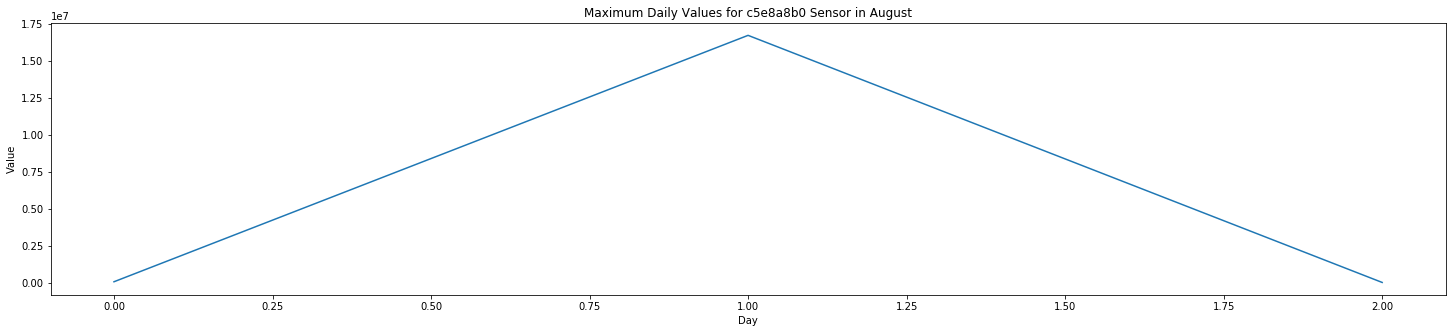

In [322]:
sensor47 = getgroup('c5e8a8b0-867a-11e6-a353-2f6c041e2491')
#sensor46jul = groupget(sensor46,7)
sensor47aug = groupget(sensor47,8)
#sensor47sep = groupget(sensor47,9)
#sensor47oct = groupget(sensor47,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor47aug.index, y=sensor47aug.value)
plt.title('Maximum Daily Values for c5e8a8b0 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for c5e8a8b0 Sensor in August&#39;)

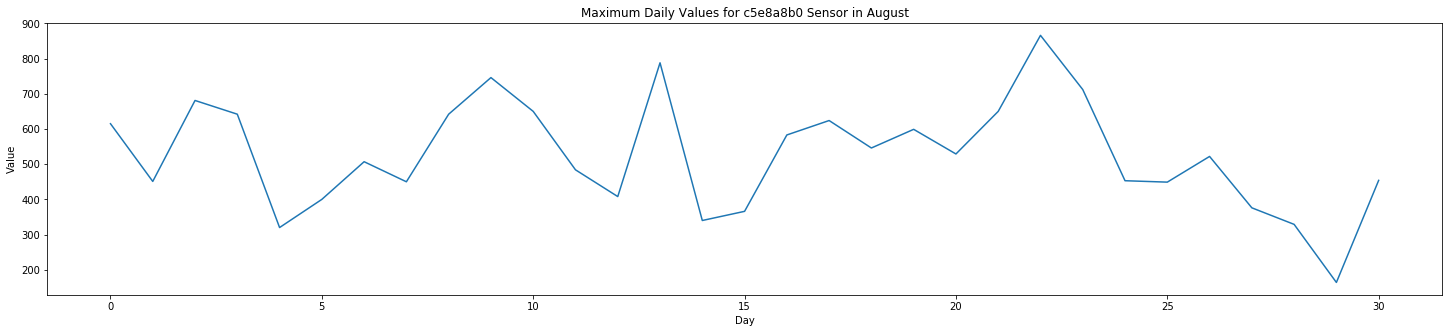

In [325]:
sensor48 = getgroup('1248ff60-e707-11e6-89c8-314aa4f67f8c')
#sensor46jul = groupget(sensor46,7)
sensor48aug = groupget(sensor48,8)
#sensor48sep = groupget(sensor48,9)
#sensor48oct = groupget(sensor48,10)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor48aug.index, y=sensor48aug.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in August')

Text(0.5, 1.0, &#39;Maximum Daily Values for e6678e90 Sensor in September&#39;)

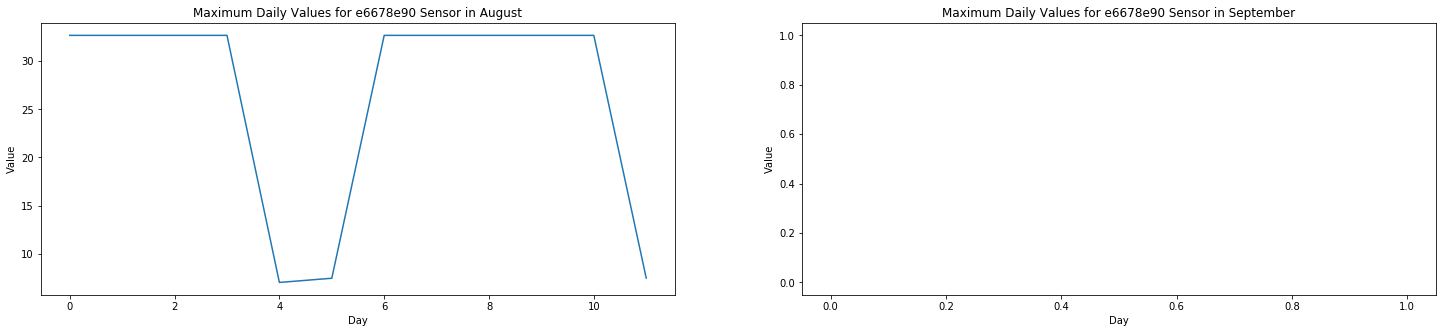

In [328]:
sensor49 = getgroup('e6678e90-8679-11e6-a353-2f6c041e2491')
#sensor46jul = groupget(sensor46,7)
sensor49aug = groupget(sensor49,8)
sensor49sep = groupget(sensor49,9)
#sensor49oct = groupget(sensor49,10)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor49aug.index, y=sensor49aug.value)
plt.title('Maximum Daily Values for e6678e90 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor49sep.index, y=sensor49sep.value)
plt.title('Maximum Daily Values for e6678e90 Sensor in September')

Text(0.5, 1.0, &#39;Maximum Daily Values for d3d698c0 Sensor in September&#39;)

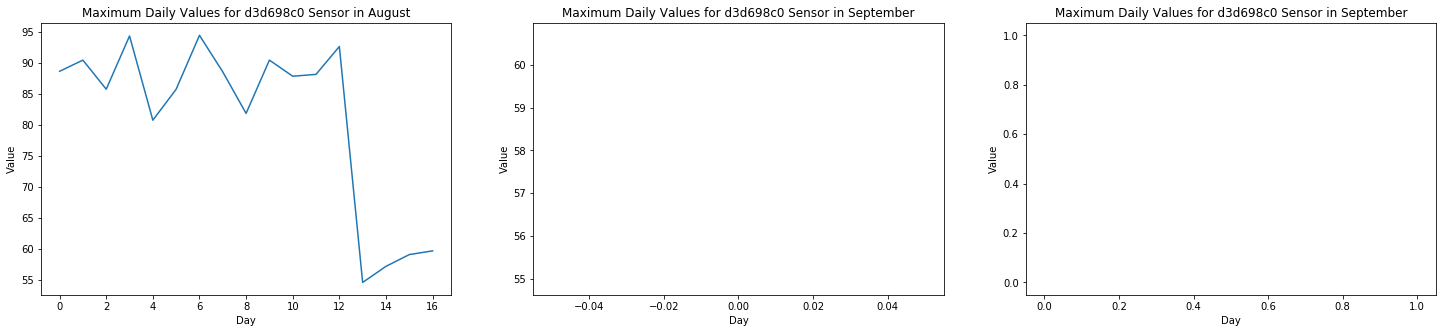

In [331]:
sensor50 = getgroup('d3d698c0-8679-11e6-a353-2f6c041e2491')
#sensor50jul = groupget(sensor50,7)
sensor50aug = groupget(sensor50,8)
sensor50sep = groupget(sensor50,9)
sensor50oct = groupget(sensor50,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor50aug.index, y=sensor50aug.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor50sep.index, y=sensor50sep.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor50oct.index, y=sensor50oct.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in October)

In [99]:
# sensor4 = getgroup('1248ff60-e707-11e6-89c8-314aa4f67f8c')
# sensor_4 = sensor4.groupby('Day').max()
# #sensor4Index = sensor_4.set_index('Month', inplace=True)
# sensor4aug = groupget(sensor_4,7)
# sensor4sep = groupget(sensor_4,8)



# # Only one sensor was available in July
# plt.figure(figsize=(25,5))
# plt.subplot(1,2,1)
# custom_plot(x=sensor4aug.index, y=sensor4aug.value)
# plt.title('Maximum Daily Values for 7635c920Sensor in August')
# plt.subplot(1,2,2)
# custom_plot(x=sensor4sep.index, y=sensor4sep.value)
# plt.title('Maximum Daily Values for 7635c920 Sensor in September')

In [100]:
# sensor3 = getgroup('7635c920-8679-11e6-a353-2f6c041e2491')
# sensor3Index = sensor3.set_index('Day', inplace=True)
# sensor3aug = groupget(sensor3,8)
# sensor3sep = groupget(sensor3,9)



# # Only one sensor was available in July
# plt.figure(figsize=(25,5))
# plt.subplot(1,2,1)
# custom_plot(x=sensor3aug.index, y=sensor3aug.value)
# plt.title('Maximum Daily Values for 7635c920Sensor in August')
# plt.subplot(1,2,2)
# custom_plot(x=sensor3sep.index, y=sensor3sep.value)
# plt.title('Maximum Daily Values for 7635c920 Sensor in September')
# #plt.subplot(1,3,3)
# #custom_plot(x=sesorc.index, y=sesorc.value)
# #plt.title('Minimum Daily Values for RSAM Sensor in July')
# #plt.xticks(rotation=90)

In [101]:
sensor_1 = plots.get_group('1248ff60-e707-11e6-89c8-314aa4f67f8c')
sensorIndex = sensor_1.set_index('timestamp', inplace=True)
#sensor_group = sensor_1.groupby(['id'])
#sensor_group1 = sensor_group.get_group('12ac7c20-e707-11e6-89c8-314aa4f67f8c')
#sensor_1 = sensor_1
#sensor_group['id'].nunique()

In [102]:
sensor_1.head()

id  value  \
timestamp                                                                
2016-07-01 00:00:31+00:00  12ac7c20-e707-11e6-89c8-314aa4f67f8c  455.0   
2016-07-01 00:10:02+00:00  12aec610-e707-11e6-89c8-314aa4f67f8c  213.0   
2016-07-01 00:40:00+00:00  12afd780-e707-11e6-89c8-314aa4f67f8c  429.0   
2016-07-01 00:20:00+00:00  12b15e20-e707-11e6-89c8-314aa4f67f8c  225.0   
2016-07-01 00:30:01+00:00  12b22170-e707-11e6-89c8-314aa4f67f8c  321.0   

                                                      sensor_id  Day  Month  \
timestamp                                                                     
2016-07-01 00:00:31+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1      7   
2016-07-01 00:10:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1      7   
2016-07-01 00:40:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1      7   
2016-07-01 00:20:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1      7   
2016-07-01 00:30:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1      7   

                           Year      Time  
timestamp                                  
2016-07-01 00:00:31+00:00  2016  00:00:31  
2016-07-01 00:10:02+00:00  2016  00:10:02  
2016-07-01 00:40:00+00:00  2016  00:40:00  
2016-07-01 00:20:00+00:00  2016  00:20:00  
2016-07-01 00:30:01+00:00  2016  00:30:01

In [103]:
#sensorIndex = sensor_1.set_index('timestamp', inplace=True)


In [104]:
# def custom_plot(x,y, ax=None, **plt_kwargs):
#     if ax is None:
#         ax = plt.gca()
#         #plt.figure(figsize=(25, 5))
#     #plt.xticks(rotation=90)
#     ax.plot(x,y, **plt_kwargs) ## example plot here
#     return(ax)

In [105]:
# def groupget(sensorname,no):
#     regroup = sensorname.groupby('Month')
#     groupno = regroup.get_group(no)
#     return groupno

In [106]:
sensor2_grp = sensor_1.groupby('Month')
sesor = sensor2_grp.get_group(7)
sesorb = sensor2_grp.get_group(8)
#sesorc = sensor2_grp.get_group(9)

In [107]:
sesor = sesor.groupby(["Day"], as_index=False)["value"].max()
sesorb = sesorb.groupby(["Day"], as_index=False)["value"].max()

Text(0.5, 1.0, &#39;Maximum Daily Values for 1248ff60 Sensor in August&#39;)

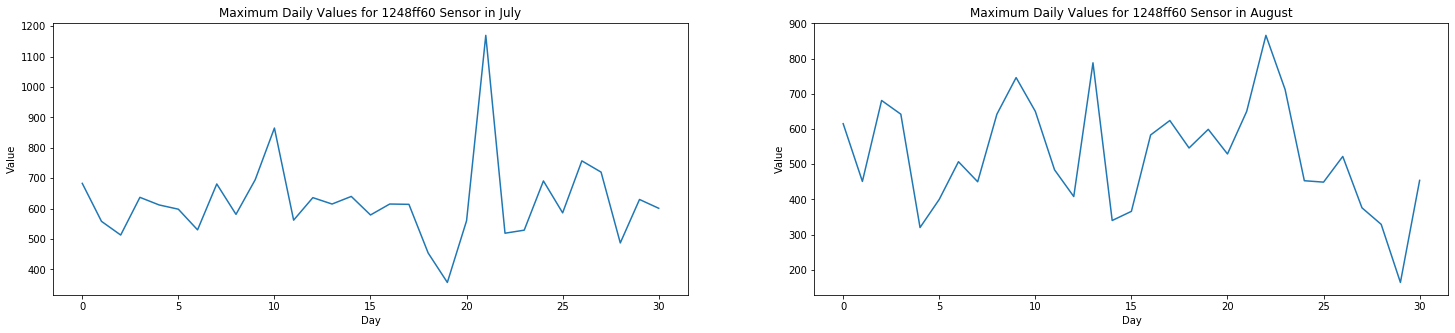

In [108]:
#sensor2Index = sensor2.set_index('Day', inplace=True)


# Only one sensor was available in July
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sesor.index, y=sesor.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in July')
plt.subplot(1,2,2)
custom_plot(x=sesorb.index, y=sesorb.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in August')
#plt.subplot(1,3,3)
#custom_plot(x=sesorc.index, y=sesorc.value)
#plt.title('Minimum Daily Values for RSAM Sensor in July')
#plt.xticks(rotation=90)

Text(0.5, 1.0, &#39;Maximum Daily Values for 1248ff60 Sensor in August&#39;)

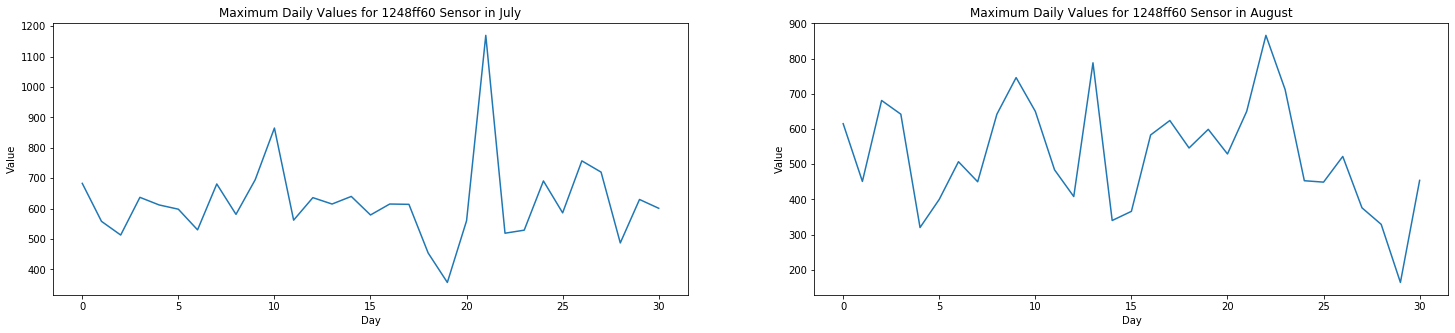

In [109]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sesor.index, y=sesor.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in July')
plt.subplot(1,2,2)
custom_plot(x=sesorb.index, y=sesorb.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in August')

## Merge Dataframes

In [110]:
# apple_fplot = df.groupby(['Year','Fungicide'])['Value'].sum()
# plot_df = apple_fplot.unstack('Fungicide').loc[:, 'Value']
# plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq='A')
# plot_df.plot()

### 3.0 Descriptive Analysis One data frame at a time **

3.1: How many sensors of each type are there?

In [111]:
#s2.type_id.value_counts()

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

You have two data frames: `sensors` and `types` Merge each sensors with its type. (Hint: Use `pd.merge()`)

Question: What does this achieve? Why should we do this?

#### We merge this to see what type of data the sensor gather. Without the datatypes file, we cannot interpret what measurements each sensor gives.

Now take the raw `data` data frame and merge it with all the `sensors` and their types.

In [112]:
first = pd.merge(datatypes, sensors, left_on='id', right_on='data_type_id', how='left')

In [113]:
first_drop = first.drop(['id_x'], axis=1)

In [114]:
#first_drop.head()

In [115]:
first_rename = first_drop.rename({'id_y': 'sensor_id'}, axis=1)

In [116]:
second = pd.merge(first_rename, nodes, left_on='node_id', right_on='id', how='left')

In [117]:
second_drop = second.drop(['description_x', 'status_x','id'], axis=1)

In [118]:
#second_drop.head()

In [119]:
third = pd.merge(datapoints, second_drop, left_on='sensor_id', right_on='sensor_id', how='left')

In [120]:
#third.head()

In [121]:
merged_data = third.drop(['created_at_x','updated_at_x','data_type_id','node_id',
                         'description_y','location','status_y','created_at_y',
                         'updated_at_y','volcano_id'], axis=1)

In [122]:
merged_data.shape

(176534, 13)

In [123]:
merged_data.head(20)

id      value                 timestamp  \
0   764c5e60-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:39:25+00:00   
1   764c5e61-8679-11e6-a353-2f6c041e2491     33.198 2016-08-03 04:39:25+00:00   
2   764dbdf0-8679-11e6-a353-2f6c041e2491     29.300 2016-08-03 04:39:25+00:00   
3   764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110 2016-08-03 04:39:25+00:00   
4   764dbdf2-8679-11e6-a353-2f6c041e2491    459.736 2016-08-03 04:39:25+00:00   
5   76507d10-8679-11e6-a353-2f6c041e2491     64.900 2016-08-03 04:39:25+00:00   
6   76514060-8679-11e6-a353-2f6c041e2491     29.940 2016-08-03 04:47:41+00:00   
7   76514061-8679-11e6-a353-2f6c041e2491    459.344 2016-08-03 04:47:41+00:00   
8   76514062-8679-11e6-a353-2f6c041e2491      3.922 2016-08-03 04:47:41+00:00   
9   765251d0-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:47:41+00:00   
10  76553800-8679-11e6-a353-2f6c041e2491  96903.370 2016-08-03 04:47:41+00:00   
11  7655fb50-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 05:08:52+00:00   
12  7655d440-8679-11e6-a353-2f6c041e2491     63.500 2016-08-03 04:47:41+00:00   
13  76569790-8679-11e6-a353-2f6c041e2491      2.114 2016-08-03 05:08:52+00:00   
14  76569791-8679-11e6-a353-2f6c041e2491    358.964 2016-08-03 05:08:52+00:00   
15  76584540-8679-11e6-a353-2f6c041e2491     28.610 2016-08-03 05:08:52+00:00   
16  7659cbe0-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 05:14:08+00:00   
17  7659cbe1-8679-11e6-a353-2f6c041e2491  96921.450 2016-08-03 05:08:52+00:00   
18  7659cbe2-8679-11e6-a353-2f6c041e2491     68.000 2016-08-03 05:08:52+00:00   
19  765b5280-8679-11e6-a353-2f6c041e2491      1.893 2016-08-03 05:14:08+00:00   

                               sensor_id  Day  Month  Year      Time  \
0   7635c920-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
1   763b9580-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
2   763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
3   763d9150-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
4   763701a1-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
5   764161e0-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
6   763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  04:47:41   
7   763701a1-8679-11e6-a353-2f6c041e2491    3      8  2016  04:47:41   
8   763b9580-8679-11e6-a353-2f6c041e2491    3      8  2016  04:47:41   
9   7635c920-8679-11e6-a353-2f6c041e2491    3      8  2016  04:47:41   
10  763d9150-8679-11e6-a353-2f6c041e2491    3      8  2016  04:47:41   
11  7635c920-8679-11e6-a353-2f6c041e2491    3      8  2016  05:08:52   
12  764161e0-8679-11e6-a353-2f6c041e2491    3      8  2016  04:47:41   
13  763b9580-8679-11e6-a353-2f6c041e2491    3      8  2016  05:08:52   
14  763701a1-8679-11e6-a353-2f6c041e2491    3      8  2016  05:08:52   
15  763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  05:08:52   
16  7635c920-8679-11e6-a353-2f6c041e2491    3      8  2016  05:14:08   
17  763d9150-8679-11e6-a353-2f6c041e2491    3      8  2016  05:08:52   
18  764161e0-8679-11e6-a353-2f6c041e2491    3      8  2016  05:08:52   
19  763b9580-8679-11e6-a353-2f6c041e2491    3      8  2016  05:14:08   

                              type            si_unit type_id  data_frequency  \
0                          battery         percentage     BAT         1800000   
1   hydrogen sulfide concentration                ppm  GP_H2S         1800000   
2                      temperature            celcius     TCA         1800000   
3                         pressure             pascal      PA         1800000   
4     carbon dioxide concentration                ppm  GP_CO2         1800000   
5                         humidity  relative humidity    HUMA         1800000   
6                      temperature            celcius     TCA         1800000   
7     carbon dioxide concentration                ppm  GP_CO2         1800000   
8   hydrogen sulfide concentration                ppm  GP_H2S         1800000   
9            

-----

In [124]:
# Separate timestamp
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'], unit='s')
merged_data['Day'] = merged_data['timestamp'].dt.day 
merged_data['Month'] = merged_data['timestamp'].dt.month

In [125]:
#merged_data

### 5.0 Time Series based analysis

Now, we are going to take this stitiched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Step 1: Take the `full` data frame and make the Time Stamp datetime format
    Step 2: Resample the dataset to the daily level. (One observation per date)
    Step 3: For the resampled data, calculate the daily mean, min and max values for each sensor.

Resample to get daily averages.
Then subset to select the rows you need.

In [126]:
#sensor_group = merged_data.groupby(['sensor_id','Day'])
sensor_group = merged_data.groupby(['Month'])

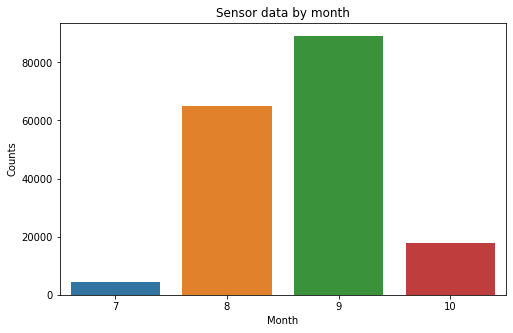

In [127]:
plt.figure(figsize=(8,5))
sns.countplot(merged_data['Month'])
plt.title('Sensor data by month')
plt.ylabel('Counts')
plt.xlabel('Month');

In [128]:
# data_1 = sensor_group.get_group("7635c920-8679-11e6-a353-2f6c041e2491")
# print("Average Battery value is:", data_1['value'].mean())
# print("Maximum Battery value is:",data_1['value'].max())
# print("Minimum Battery value is:",data_1['value'].min())

In [129]:
sensor_group.first()

id  value                 timestamp  \
Month                                                                          
7      12ac7c20-e707-11e6-89c8-314aa4f67f8c  455.0 2016-07-01 00:00:31+00:00   
8      764c5e60-8679-11e6-a353-2f6c041e2491   98.0 2016-08-03 04:39:25+00:00   
9      35d63a60-8695-11e6-b9eb-2b0883ebdaeb   93.0 2016-09-01 00:28:19+00:00   
10     fc2bb6b0-879c-11e6-b4e7-fb610e712037   81.0 2016-10-01 00:01:27+00:00   

                                  sensor_id  Day  Year      Time  \
Month                                                              
7      1248ff60-e707-11e6-89c8-314aa4f67f8c    1  2016  00:00:31   
8      7635c920-8679-11e6-a353-2f6c041e2491    3  2016  04:39:25   
9      e66851e1-8679-11e6-a353-2f6c041e2491    1  2016  00:28:19   
10     763bbc90-8679-11e6-a353-2f6c041e2491    1  2016  00:01:27   

                               type     si_unit type_id  data_frequency  name  
Month                                                                          
7                              RSAM      counts    RSAM         1800000  RSAM  
8                           battery  percentage     BAT         1800000   N10  
9      carbon dioxide concentration         ppm  GP_CO2         1800000    N6  
10                      temperature     celcius     TCA         1800000    N7

In [130]:
data_1 = sensor_group.get_group(7)
# print("Average Battery value is:", data_1['value'].mean())
# print("Maximum Battery value is:",data_1['value'].max())
# print("Minimum Battery value is:",data_1['value'].min())
data_1

id  value                 timestamp  \
167718  12ac7c20-e707-11e6-89c8-314aa4f67f8c  455.0 2016-07-01 00:00:31+00:00   
167719  12aec610-e707-11e6-89c8-314aa4f67f8c  213.0 2016-07-01 00:10:02+00:00   
167720  12afd780-e707-11e6-89c8-314aa4f67f8c  429.0 2016-07-01 00:40:00+00:00   
167721  12b15e20-e707-11e6-89c8-314aa4f67f8c  225.0 2016-07-01 00:20:00+00:00   
167722  12b22170-e707-11e6-89c8-314aa4f67f8c  321.0 2016-07-01 00:30:01+00:00   
...                                      ...    ...                       ...   
172216  260073d0-e707-11e6-89c8-314aa4f67f8c  335.0 2016-07-31 20:30:02+00:00   
172217  26057ce0-e707-11e6-89c8-314aa4f67f8c  474.0 2016-07-31 21:00:01+00:00   
172218  260bbe70-e707-11e6-89c8-314aa4f67f8c  460.0 2016-07-31 21:40:00+00:00   
172219  26105250-e707-11e6-89c8-314aa4f67f8c  362.0 2016-07-31 22:50:02+00:00   
172220  26155b60-e707-11e6-89c8-314aa4f67f8c  268.0 2016-07-31 23:30:02+00:00   

                                   sensor_id  Day  Year      Time  type  \
167718  1248ff60-e707-11e6-89c8-314aa4f67f8c    1  2016  00:00:31  RSAM   
167719  1248ff60-e707-11e6-89c8-314aa4f67f8c    1  2016  00:10:02  RSAM   
167720  1248ff60-e707-11e6-89c8-314aa4f67f8c    1  2016  00:40:00  RSAM   
167721  1248ff60-e707-11e6-89c8-314aa4f67f8c    1  2016  00:20:00  RSAM   
167722  1248ff60-e707-11e6-89c8-314aa4f67f8c    1  2016  00:30:01  RSAM   
...                                      ...  ...   ...       ...   ...   
172216  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  20:30:02  RSAM   
172217  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  21:00:01  RSAM   
172218  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  21:40:00  RSAM   
172219  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  22:50:02  RSAM   
172220  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  23:30:02  RSAM   

       si_unit type_id  data_frequency  name  
167718  counts    RSAM         1800000  RSAM  
167719  counts    RSAM         1800000  RSAM  
167720  counts    RSAM         1800000  RSAM  
167721  counts    RSAM         1800000  RSAM  
167722  counts    RSAM         1800000  RSAM  
...        ...     ...             ...   ...  
172216  counts    RSAM         1800000  RSAM  
172217  counts    RSAM         1800000  RSAM  
172218  counts    RSAM         1800000  RSAM  
172219  counts    RSAM         1800000  RSAM  
172220  counts    RSAM         1800000  RSAM  

[4392 rows x 12 columns]

In [131]:
data_1['sensor_id'].value_counts()

1248ff60-e707-11e6-89c8-314aa4f67f8c    4392
Name: sensor_id, dtype: int64

In [132]:
#data_1.info()

In [133]:
data_1.tail()

id  value                 timestamp  \
172216  260073d0-e707-11e6-89c8-314aa4f67f8c  335.0 2016-07-31 20:30:02+00:00   
172217  26057ce0-e707-11e6-89c8-314aa4f67f8c  474.0 2016-07-31 21:00:01+00:00   
172218  260bbe70-e707-11e6-89c8-314aa4f67f8c  460.0 2016-07-31 21:40:00+00:00   
172219  26105250-e707-11e6-89c8-314aa4f67f8c  362.0 2016-07-31 22:50:02+00:00   
172220  26155b60-e707-11e6-89c8-314aa4f67f8c  268.0 2016-07-31 23:30:02+00:00   

                                   sensor_id  Day  Year      Time  type  \
172216  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  20:30:02  RSAM   
172217  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  21:00:01  RSAM   
172218  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  21:40:00  RSAM   
172219  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  22:50:02  RSAM   
172220  1248ff60-e707-11e6-89c8-314aa4f67f8c   31  2016  23:30:02  RSAM   

       si_unit type_id  data_frequency  name  
172216  counts    RSAM         1800000  RSAM  
172217  counts    RSAM         1800000  RSAM  
172218  counts    RSAM         1800000  RSAM  
172219  counts    RSAM         1800000  RSAM  
172220  counts    RSAM         1800000  RSAM

In [134]:
# print("Average RSAM value is:", data_1['value'].mean())
# print("Maximum RSAM value is:",data_1['value'].max())
# print("Minimum RSAM value is:",data_1['value'].min())

In [135]:
data_s = data_1.groupby('Day')
data_s.first()

id  value                 timestamp  \
Day                                                                          
1    12ac7c20-e707-11e6-89c8-314aa4f67f8c  455.0 2016-07-01 00:00:31+00:00   
2    1359ac10-e707-11e6-89c8-314aa4f67f8c  218.0 2016-07-02 00:30:02+00:00   
3    140889b0-e707-11e6-89c8-314aa4f67f8c  257.0 2016-07-03 00:40:01+00:00   
4    14b51d60-e707-11e6-89c8-314aa4f67f8c  169.0 2016-07-04 00:30:02+00:00   
5    155ad340-e707-11e6-89c8-314aa4f67f8c  475.0 2016-07-05 00:30:00+00:00   
6    15f95d30-e707-11e6-89c8-314aa4f67f8c  238.0 2016-07-06 01:10:00+00:00   
7    168aa0b0-e707-11e6-89c8-314aa4f67f8c  207.0 2016-07-07 00:03:30+00:00   
8    172ef700-e707-11e6-89c8-314aa4f67f8c  268.0 2016-07-08 00:40:02+00:00   
9    17ca2590-e707-11e6-89c8-314aa4f67f8c  231.0 2016-07-09 00:20:01+00:00   
10   18585bd0-e707-11e6-89c8-314aa4f67f8c  198.0 2016-07-10 00:20:00+00:00   
11   18f474c0-e707-11e6-89c8-314aa4f67f8c  264.0 2016-07-11 00:10:02+00:00   
12   19960bf0-e707-11e6-89c8-314aa4f67f8c  216.0 2016-07-12 00:30:00+00:00   
13   1a388d80-e707-11e6-89c8-314aa4f67f8c  181.0 2016-07-13 00:30:01+00:00   
14   1ad25c80-e707-11e6-89c8-314aa4f67f8c  271.0 2016-07-14 00:50:02+00:00   
15   1b677090-e707-11e6-89c8-314aa4f67f8c  484.0 2016-07-15 00:03:20+00:00   
16   1c038980-e707-11e6-89c8-314aa4f67f8c  424.0 2016-07-16 00:10:00+00:00   
17   1ca43650-e707-11e6-89c8-314aa4f67f8c  106.0 2016-07-17 00:20:01+00:00   
18   1d3f3dd0-e707-11e6-89c8-314aa4f67f8c  433.0 2016-07-18 00:20:02+00:00   
19   1de011b0-e707-11e6-89c8-314aa4f67f8c   97.0 2016-07-19 00:40:02+00:00   
20   1e7c51b0-e707-11e6-89c8-314aa4f67f8c  106.0 2016-07-20 00:30:02+00:00   
21   1f1adba0-e707-11e6-89c8-314aa4f67f8c  159.0 2016-07-21 00:00:41+00:00   
22   1fbbaf80-e707-11e6-89c8-314aa4f67f8c  238.0 2016-07-22 00:20:00+00:00   
23   2052bf60-e707-11e6-89c8-314aa4f67f8c  456.0 2016-07-23 00:10:02+00:00   
24   20f05ef0-e707-11e6-89c8-314aa4f67f8c  227.0 2016-07-24 00:03:38+00:00   
25   21a68f90-e707-11e6-89c8-314aa4f67f8c  301.0 2016-07-25 00:50:00+00:00   
26   22462af0-e707-11e6-89c8-314aa4f67f8c  108.0 2016-07-26 00:10:02+00:00   
27   22e29200-e707-11e6-89c8-314aa4f67f8c  379.0 2016-07-27 00:00:10+00:00   
28   23895950-e707-11e6-89c8-314aa4f67f8c  388.0 2016-07-28 00:10:00+00:00   
29   242aa260-e707-11e6-89c8-314aa4f67f8c  162.0 2016-07-29 00:00:20+00:00   
30   24d2c940-e707-11e6-89c8-314aa4f67f8c  377.0 2016-07-30 00:03:27+00:00   
31   2577bbd0-e707-11e6-89c8-314aa4f67f8c  398.0 2016-07-31 00:30:00+00:00   

                                sensor_id  Year      Time  type si_unit  \
Day                                                                       
1    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:00:31  RSAM  counts   
2    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:30:02  RSAM  counts   
3    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:40:01  RSAM  counts   
4    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:30:02  RSAM  counts   
5    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:30:00  RSAM  counts   
6    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  01:10:00  RSAM  counts   
7    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:03:30  RSAM  counts   
8    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:40:02  RSAM  counts   
9    1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:20:01  RSAM  counts   
10   1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:20:00  RSAM  counts   
11   1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:10:02  RSAM  counts   
12   1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:30:00  RSAM  counts   
13   1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:30:01  RSAM  counts   
14   1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:50:02  RSAM  counts   
15   1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:03:20  RSAM  counts   
16   1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:10:00  RSAM  counts   
17   1248ff60-e707-11e6-89c8-314aa4f67f8c  2016  00:20:01  RSAM  counts   
18   1248ff60-e707-11e6-89c8-314aa4f67f

## July Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 &lt;a list of 31 Text xticklabel objects&gt;)

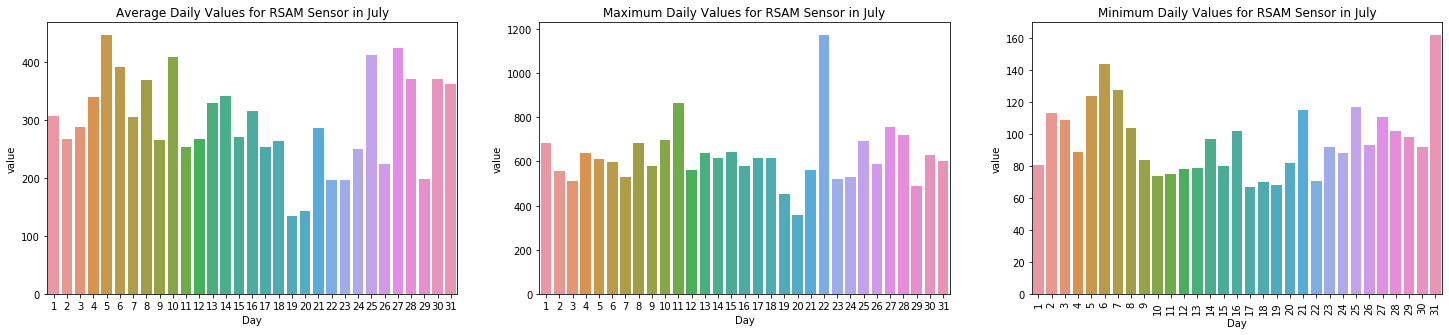

In [136]:
data_mean = data_s.mean().sort_values('value',ascending=False)
data_max = data_s.max().sort_values('value',ascending=False)
data_min = data_s.min().sort_values('value',ascending=False)

# Only one sensor was available in July
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(x=data_mean.index, y=data_mean['value'])
plt.title('Average Daily Values for RSAM Sensor in July')
plt.subplot(1,3,2)
sns.barplot(x=data_max.index, y=data_max['value'])
plt.title('Maximum Daily Values for RSAM Sensor in July')
plt.subplot(1,3,3)
sns.barplot(x=data_min.index, y=data_min['value'])
plt.title('Minimum Daily Values for RSAM Sensor in July')
plt.xticks(rotation=90)


## August Data

In [137]:
data_2 = sensor_group.get_group(8)
data_2.head()

id      value                 timestamp  \
0  764c5e60-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:39:25+00:00   
1  764c5e61-8679-11e6-a353-2f6c041e2491     33.198 2016-08-03 04:39:25+00:00   
2  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300 2016-08-03 04:39:25+00:00   
3  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110 2016-08-03 04:39:25+00:00   
4  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736 2016-08-03 04:39:25+00:00   

                              sensor_id  Day  Year      Time  \
0  7635c920-8679-11e6-a353-2f6c041e2491    3  2016  04:39:25   
1  763b9580-8679-11e6-a353-2f6c041e2491    3  2016  04:39:25   
2  763ca6f0-8679-11e6-a353-2f6c041e2491    3  2016  04:39:25   
3  763d9150-8679-11e6-a353-2f6c041e2491    3  2016  04:39:25   
4  763701a1-8679-11e6-a353-2f6c041e2491    3  2016  04:39:25   

                             type     si_unit type_id  data_frequency name  
0                         battery  percentage     BAT         1800000  N10  
1  hydrogen sulfide concentration         ppm  GP_H2S         1800000  N10  
2                     temperature     celcius     TCA         1800000  N10  
3                        pressure      pascal      PA         1800000  N10  
4    carbon dioxide concentration         ppm  GP_CO2         1800000  N10

In [138]:
data_2['sensor_id'].value_counts()

e66592c0-8679-11e6-a353-2f6c041e2491    5180
e6691530-8679-11e6-a353-2f6c041e2491    5151
e66851e0-8679-11e6-a353-2f6c041e2491    5130
e6678e91-8679-11e6-a353-2f6c041e2491    5118
e66851e1-8679-11e6-a353-2f6c041e2491    5048
                                        ... 
c5e881a0-867a-11e6-a353-2f6c041e2491     104
c5e881a1-867a-11e6-a353-2f6c041e2491     104
c5e8a8b0-867a-11e6-a353-2f6c041e2491     104
c5e685d0-867a-11e6-a353-2f6c041e2491     104
c5e9ba20-867a-11e6-a353-2f6c041e2491     104
Name: sensor_id, Length: 61, dtype: int64

In [139]:
#data_2.mean().sort_values('value',ascending=False)

In [140]:
data_2mean = data_2.groupby(["Day", "type_id"], as_index=False)["value"].mean()
data_2max = data_2.groupby(["Day", "type_id"], as_index=False)["value"].max()
data_2min = data_2.groupby(["Day", "type_id"], as_index=False)["value"].min()

In [141]:
data_2mean['type_id'].nunique()

7

In [144]:
#data_2mean['type_id']

&lt;matplotlib.legend.Legend at 0x7f84f76cbed0&gt;

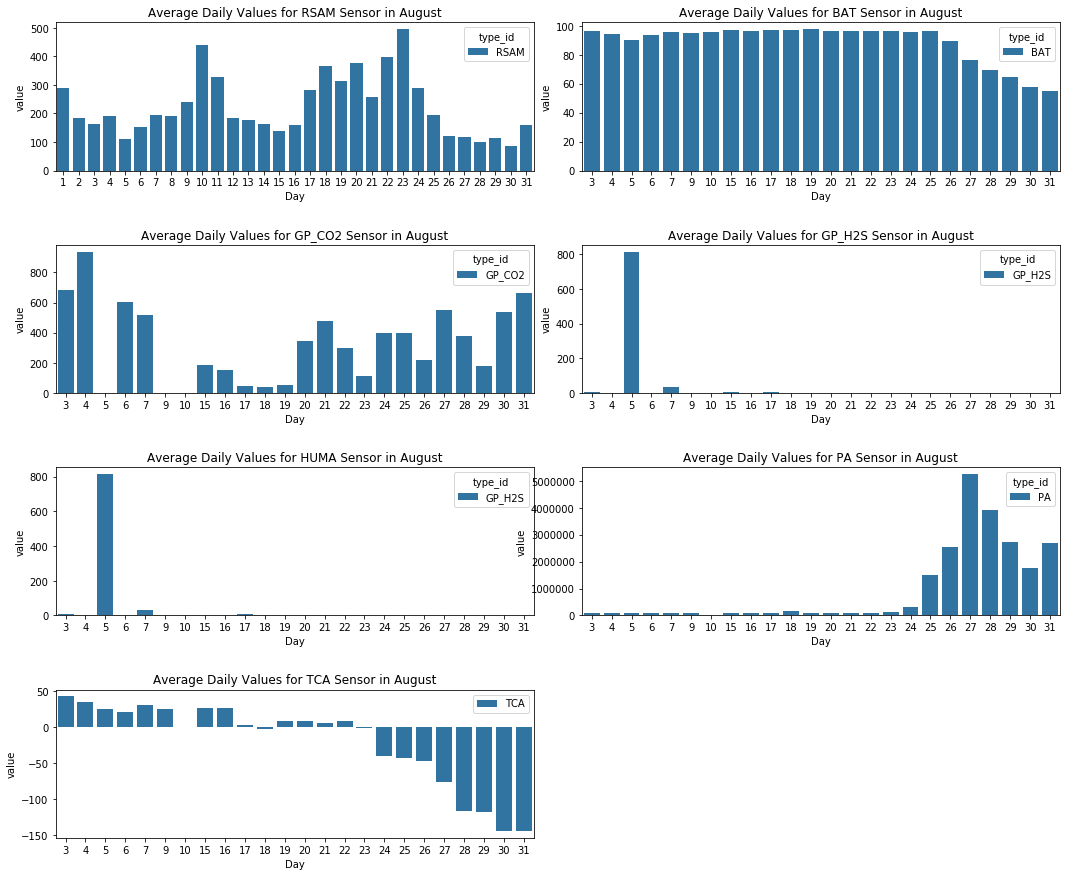

In [145]:
df1 = data_2mean[data_2mean.type_id=="RSAM"]
df2 = data_2mean[data_2mean.type_id=="BAT"]
df3 = data_2mean[data_2mean.type_id=="GP_CO2"]
df4 = data_2mean[data_2mean.type_id=="GP_H2S"]
df5 = data_2mean[data_2mean.type_id=="GP_H2S"]
df6 = data_2mean[data_2mean.type_id=="PA"]
df7 = data_2mean[data_2mean.type_id=="TCA"]

plt.figure(figsize=(18,15))
#fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df1)
plt.title('Average Daily Values for RSAM Sensor in August')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df2)
plt.title('Average Daily Values for BAT Sensor in August')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df3)
plt.title('Average Daily Values for GP_CO2 Sensor in August')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df4)
plt.title('Average Daily Values for GP_H2S Sensor in August')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df5)
plt.title('Average Daily Values for HUMA Sensor in August')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df6)
plt.title('Average Daily Values for PA Sensor in August')
plt.subplot(4,2,7)
sns.barplot(x="Day", y="value", hue= "type_id", data=df7)
plt.title('Average Daily Values for TCA Sensor in August')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

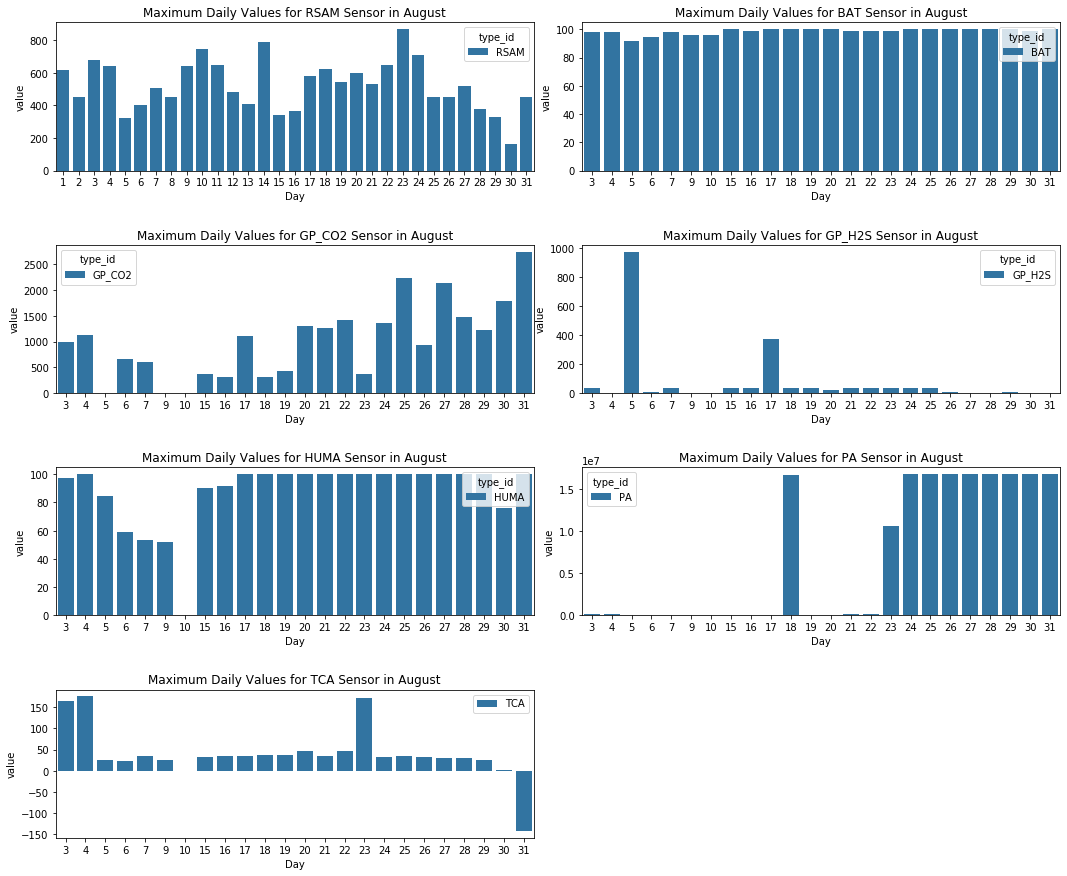

In [173]:
df1_max = data_2max[data_2max.type_id=="RSAM"]
df2_max = data_2max[data_2max.type_id=="BAT"]
df3_max = data_2max[data_2max.type_id=="GP_CO2"]
df4_max = data_2max[data_2max.type_id=="GP_H2S"]
df5_max = data_2max[data_2max.type_id=="HUMA"]
df6_max = data_2max[data_2max.type_id=="PA"]
df7_max = data_2max[data_2max.type_id=="TCA"]


plt.figure(figsize=(18,15))
fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df1_max)
plt.title('Maximum Daily Values for RSAM Sensor in August')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df2_max)
plt.title('Maximum Daily Values for BAT Sensor in August')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df3_max)
plt.title('Maximum Daily Values for GP_CO2 Sensor in August')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df4_max)
plt.title('Maximum Daily Values for GP_H2S Sensor in August')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df5_max)
plt.title('Maximum Daily Values for HUMA Sensor in August')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df6_max)
plt.title('Maximum Daily Values for PA Sensor in August')
plt.subplot(4,2,7)
sns.barplot(x="Day", y="value", hue= "type_id", data=df7_max)
plt.title('Maximum Daily Values for TCA Sensor in August')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

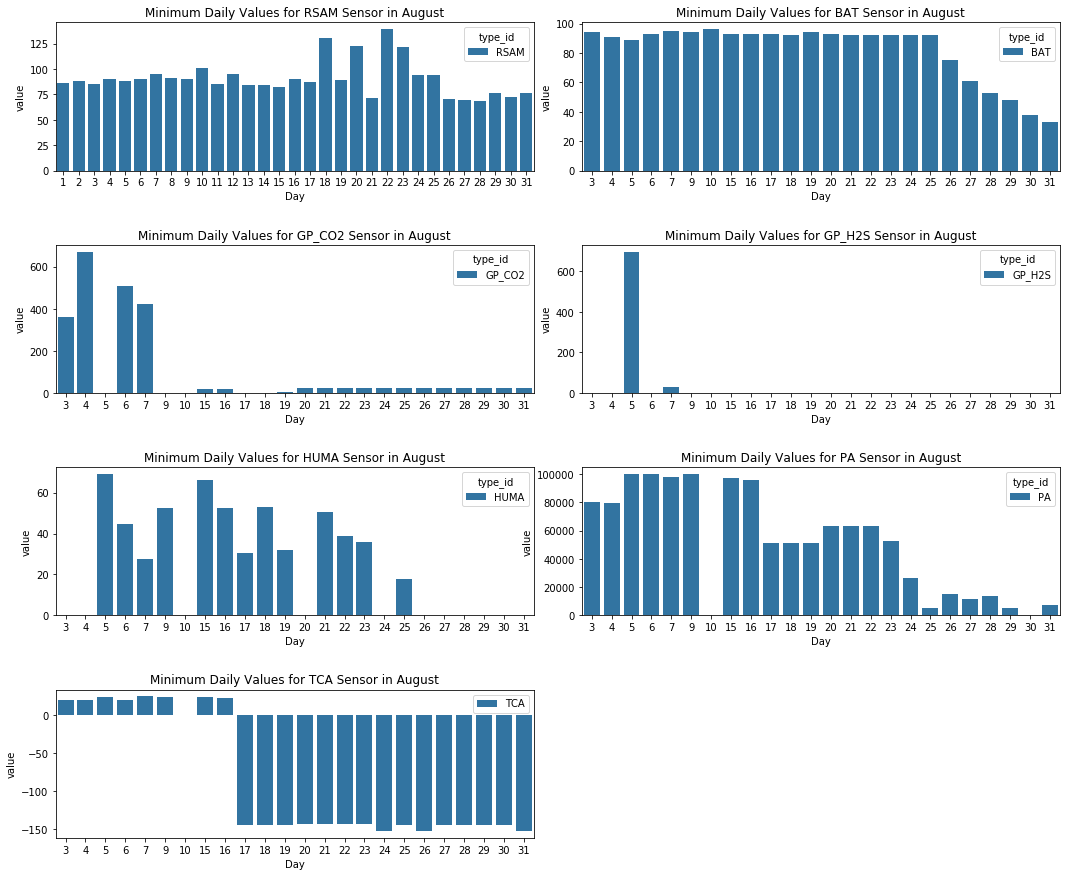

In [174]:
df1_min = data_2min[data_2min.type_id=="RSAM"]
df2_min = data_2min[data_2min.type_id=="BAT"]
df3_min = data_2min[data_2min.type_id=="GP_CO2"]
df4_min = data_2min[data_2min.type_id=="GP_H2S"]
df5_min = data_2min[data_2min.type_id=="HUMA"]
df6_min = data_2min[data_2min.type_id=="PA"]
df7_min = data_2min[data_2min.type_id=="TCA"]


plt.figure(figsize=(18,15))
fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df1_min)
plt.title('Minimum Daily Values for RSAM Sensor in August')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df2_min)
plt.title('Minimum Daily Values for BAT Sensor in August')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df3_min)
plt.title('Minimum Daily Values for GP_CO2 Sensor in August')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df4_min)
plt.title('Minimum Daily Values for GP_H2S Sensor in August')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df5_min)
plt.title('Minimum Daily Values for HUMA Sensor in August')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df6_min)
plt.title('Minimum Daily Values for PA Sensor in August')
plt.subplot(4,2,7)
sns.barplot(x="Day", y="value", hue= "type_id", data=df7_min)
plt.title('Minimum Daily Values for TCA Sensor in August')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

## September Data

In [175]:
# data_2s = data_2.groupby('Day')
# data_2s.first()

In [177]:
data_3 = sensor_group.get_group(9)
data_3.head()

id      value  \
60382  35d63a60-8695-11e6-b9eb-2b0883ebdaeb        NaN   
60383  35d96eb0-8695-11e6-b9eb-2b0883ebdaeb      93.00   
60384  35dcca10-8695-11e6-b9eb-2b0883ebdaeb  117828.02   
60385  35e02570-8695-11e6-b9eb-2b0883ebdaeb        NaN   
60386  35e332b0-8695-11e6-b9eb-2b0883ebdaeb        NaN   

                      timestamp                             sensor_id  \
60382 2016-09-01 00:28:19+00:00  e66851e1-8679-11e6-a353-2f6c041e2491   
60383 2016-09-01 00:30:11+00:00  7635f030-8679-11e6-a353-2f6c041e2491   
60384 2016-09-01 00:30:11+00:00  763d6a40-8679-11e6-a353-2f6c041e2491   
60385 2016-09-01 00:30:41+00:00  e6678e91-8679-11e6-a353-2f6c041e2491   
60386 2016-09-01 00:33:03+00:00  e66851e1-8679-11e6-a353-2f6c041e2491   

                               type     si_unit type_id  data_frequency name  \
60382  carbon dioxide concentration         ppm  GP_CO2         1800000   N6   
60383                       battery  percentage     BAT         1800000   N7   
60384                      pressure      pascal      PA         1800000   N7   
60385                   temperature     celcius     TCA         1800000   N6   
60386  carbon dioxide concentration         ppm  GP_CO2         1800000   N6   

       Day  
60382    1  
60383    1  
60384    1  
60385    1  
60386    1

In [193]:
#data_3['sensor_id'].value_counts()

In [179]:
data_3mean = data_3.groupby(["Day", "type_id"], as_index=False)["value"].mean()
data_3max = data_3.groupby(["Day", "type_id"], as_index=False)["value"].max()
data_3min = data_3.groupby(["Day", "type_id"], as_index=False)["value"].min()

In [181]:
data_3['type_id'].nunique()

6

In [182]:
data_3.head()

id      value  \
60382  35d63a60-8695-11e6-b9eb-2b0883ebdaeb        NaN   
60383  35d96eb0-8695-11e6-b9eb-2b0883ebdaeb      93.00   
60384  35dcca10-8695-11e6-b9eb-2b0883ebdaeb  117828.02   
60385  35e02570-8695-11e6-b9eb-2b0883ebdaeb        NaN   
60386  35e332b0-8695-11e6-b9eb-2b0883ebdaeb        NaN   

                      timestamp                             sensor_id  \
60382 2016-09-01 00:28:19+00:00  e66851e1-8679-11e6-a353-2f6c041e2491   
60383 2016-09-01 00:30:11+00:00  7635f030-8679-11e6-a353-2f6c041e2491   
60384 2016-09-01 00:30:11+00:00  763d6a40-8679-11e6-a353-2f6c041e2491   
60385 2016-09-01 00:30:41+00:00  e6678e91-8679-11e6-a353-2f6c041e2491   
60386 2016-09-01 00:33:03+00:00  e66851e1-8679-11e6-a353-2f6c041e2491   

                               type     si_unit type_id  data_frequency name  \
60382  carbon dioxide concentration         ppm  GP_CO2         1800000   N6   
60383                       battery  percentage     BAT         1800000   N7   
60384                      pressure      pascal      PA         1800000   N7   
60385                   temperature     celcius     TCA         1800000   N6   
60386  carbon dioxide concentration         ppm  GP_CO2         1800000   N6   

       Day  
60382    1  
60383    1  
60384    1  
60385    1  
60386    1

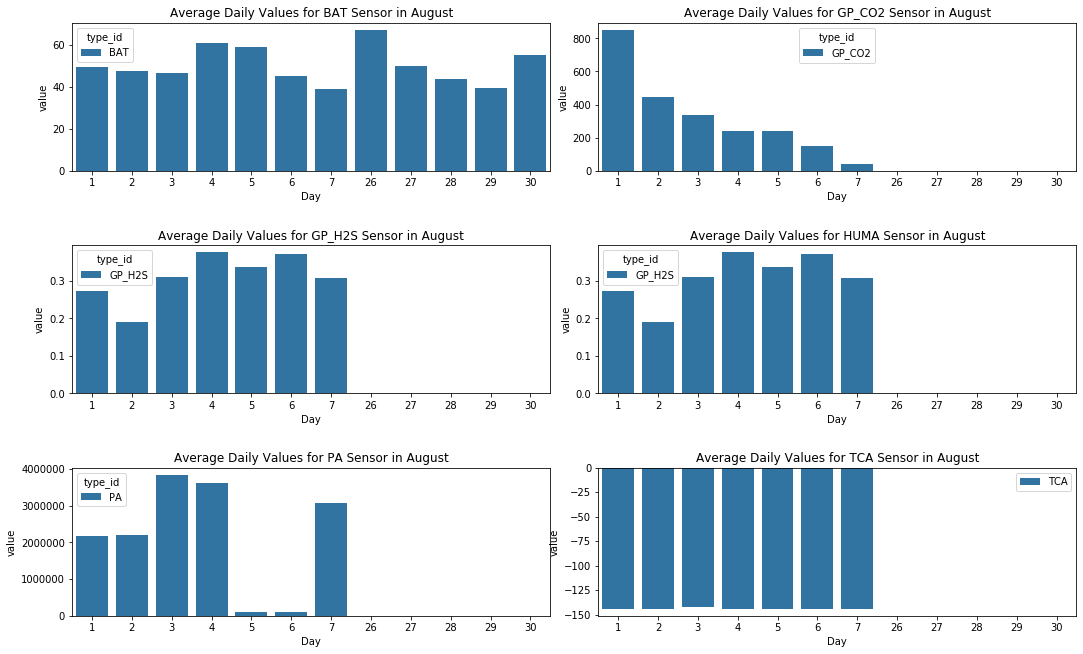

In [187]:
df9 = data_3mean[data_3mean.type_id=="BAT"]
df10 = data_3mean[data_3mean.type_id=="GP_CO2"]
df11 = data_3mean[data_3mean.type_id=="GP_H2S"]
df12 = data_3mean[data_3mean.type_id=="GP_H2S"]
df13 = data_3mean[data_3mean.type_id=="PA"]
df14 = data_3mean[data_3mean.type_id=="TCA"]

plt.figure(figsize=(18,15))

plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df9)
plt.title('Average Daily Values for BAT Sensor in September')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df10)
plt.title('Average Daily Values for GP_CO2 Sensor in September')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df11)
plt.title('Average Daily Values for GP_H2S Sensor in September')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df12)
plt.title('Average Daily Values for HUMA Sensor in September')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df13)
plt.title('Average Daily Values for PA Sensor in September')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df14)
plt.title('Average Daily Values for TCA Sensor in September')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

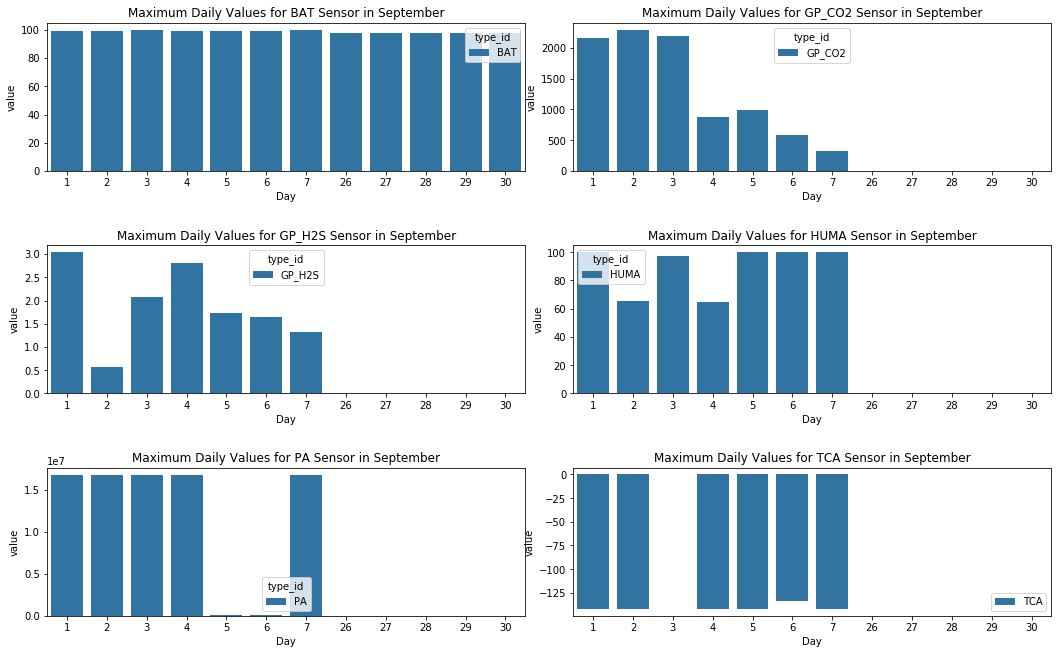

In [192]:
df9_max = data_3max[data_3max.type_id=="BAT"]
df10_max = data_3max[data_3max.type_id=="GP_CO2"]
df11_max = data_3max[data_3max.type_id=="GP_H2S"]
df12_max = data_3max[data_3max.type_id=="HUMA"]
df13_max = data_3max[data_3max.type_id=="PA"]
df14_max = data_3max[data_3max.type_id=="TCA"]


plt.figure(figsize=(18,15))
fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df9_max)
plt.title('Maximum Daily Values for BAT Sensor in September')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df10_max)
plt.title('Maximum Daily Values for GP_CO2 Sensor in September')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df11_max)
plt.title('Maximum Daily Values for GP_H2S Sensor in September')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df12_max)
plt.title('Maximum Daily Values for HUMA Sensor in September')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df13_max)
plt.title('Maximum Daily Values for PA Sensor in September')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df14_max)
plt.title('Maximum Daily Values for TCA Sensor in September')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

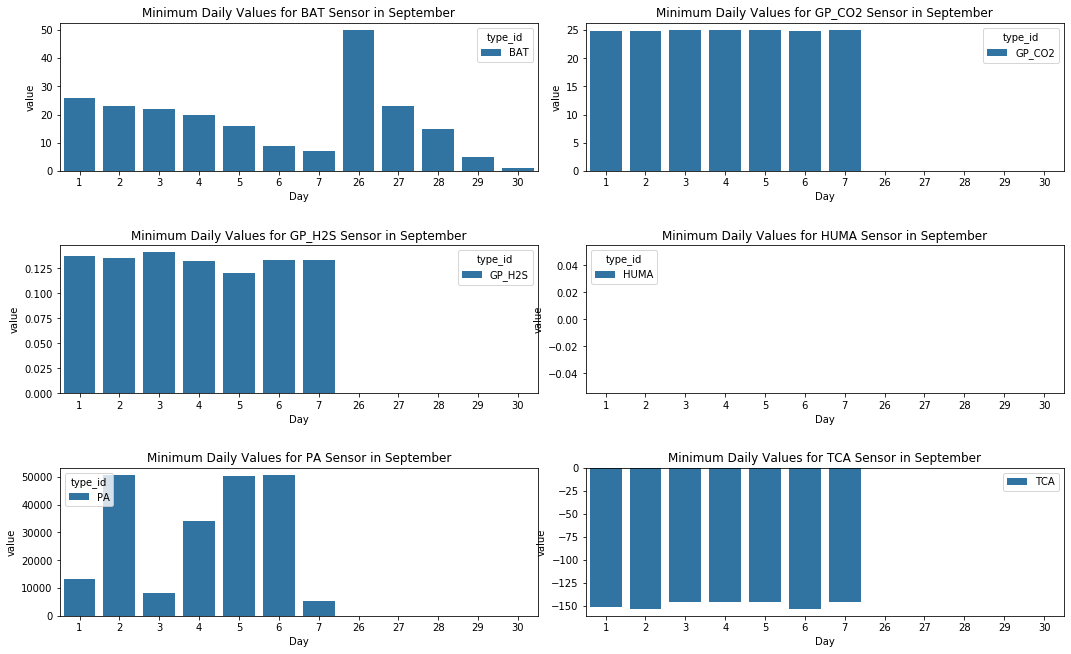

In [191]:
df9_min = data_3min[data_3min.type_id=="BAT"]
df10_min = data_3min[data_3min.type_id=="GP_CO2"]
df11_min = data_3min[data_3min.type_id=="GP_H2S"]
df12_min = data_3min[data_3min.type_id=="HUMA"]
df13_min = data_3min[data_3min.type_id=="PA"]
df14_min = data_3min[data_3min.type_id=="TCA"]


plt.figure(figsize=(18,15))
fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df9_min)
plt.title('Minimum Daily Values for BAT Sensor in September')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df10_min)
plt.title('Minimum Daily Values for GP_CO2 Sensor in September')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df11_min)
plt.title('Minimum Daily Values for GP_H2S Sensor in September')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df12_min)
plt.title('Minimum Daily Values for HUMA Sensor in September')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df13_min)
plt.title('Minimum Daily Values for PA Sensor in September')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df14_min)
plt.title('Minimum Daily Values for TCA Sensor in September')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

## October Data

In [194]:
data_4 = sensor_group.get_group(10)
data_4.head()

id  value                 timestamp  \
149674  fc2bb6b0-879c-11e6-b4e7-fb610e712037    NaN 2016-10-01 00:01:27+00:00   
149675  fc2c52f0-879c-11e6-b4e7-fb610e712037    NaN 2016-10-01 00:01:27+00:00   
149676  451ef210-879d-11e6-b4e7-fb610e712037    NaN 2016-10-01 00:03:19+00:00   
149677  45218a20-879d-11e6-b4e7-fb610e712037    NaN 2016-10-01 00:03:19+00:00   
149678  575f56e0-879d-11e6-b4e7-fb610e712037    NaN 2016-10-01 00:05:00+00:00   

                                   sensor_id                            type  \
149674  763bbc90-8679-11e6-a353-2f6c041e2491                     temperature   
149675  76402960-8679-11e6-a353-2f6c041e2491                        humidity   
149676  d3d3b291-8679-11e6-a353-2f6c041e2491    carbon dioxide concentration   
149677  d3d56040-8679-11e6-a353-2f6c041e2491                        pressure   
149678  763701a0-8679-11e6-a353-2f6c041e2491  hydrogen sulfide concentration   

                  si_unit type_id  data_frequency name  Day  
149674            celcius     TCA         1800000   N7    1  
149675  relative humidity    HUMA         1800000   N7    1  
149676                ppm  GP_CO2         1800000   N5    1  
149677             pascal      PA         1800000   N5    1  
149678                ppm  GP_H2S         1800000   N7    1

In [195]:
data_4mean = data_4.groupby(["Day", "type_id"], as_index=False)["value"].mean()
data_4max = data_4.groupby(["Day", "type_id"], as_index=False)["value"].max()
data_4min = data_4.groupby(["Day", "type_id"], as_index=False)["value"].min()

In [201]:
#data_4.head()

In [196]:
data_4['type_id'].nunique()

6

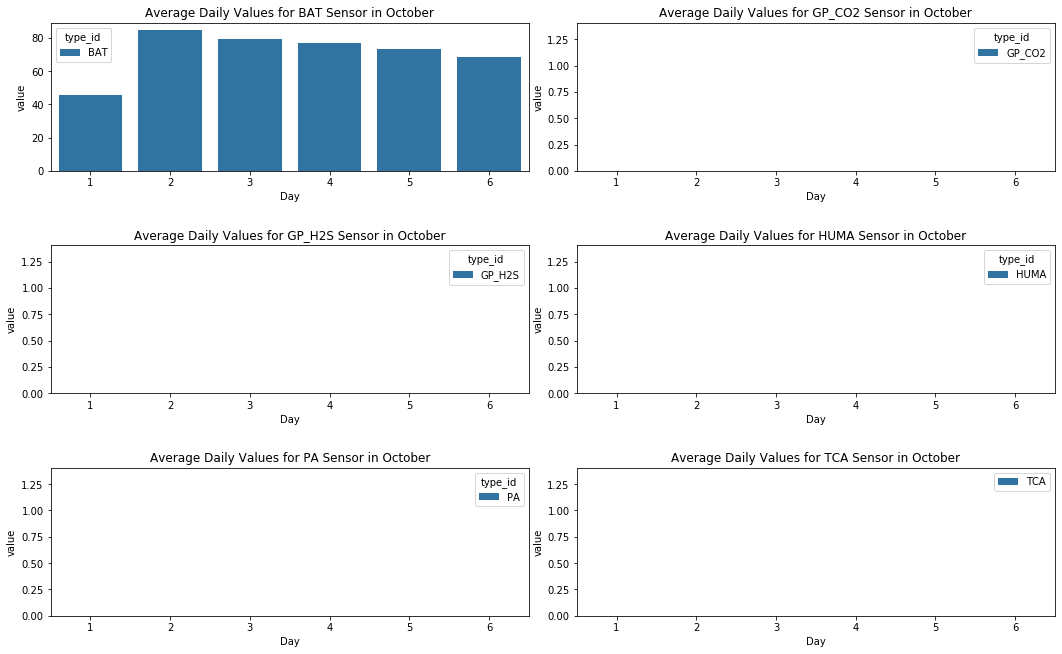

In [202]:
df16 = data_4mean[data_4mean.type_id=="BAT"]
df17 = data_4mean[data_4mean.type_id=="GP_CO2"]
df18 = data_4mean[data_4mean.type_id=="GP_H2S"]
df19 = data_4mean[data_4mean.type_id=="HUMA"]
df20 = data_4mean[data_4mean.type_id=="PA"]
df21 = data_4mean[data_4mean.type_id=="TCA"]

plt.figure(figsize=(18,15))
fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df16)
plt.title('Average Daily Values for BAT Sensor in October')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df17)
plt.title('Average Daily Values for GP_CO2 Sensor in October')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df18)
plt.title('Average Daily Values for GP_H2S Sensor in October')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df19)
plt.title('Average Daily Values for HUMA Sensor in October')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df20)
plt.title('Average Daily Values for PA Sensor in October')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df21)
plt.title('Average Daily Values for TCA Sensor in October')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()


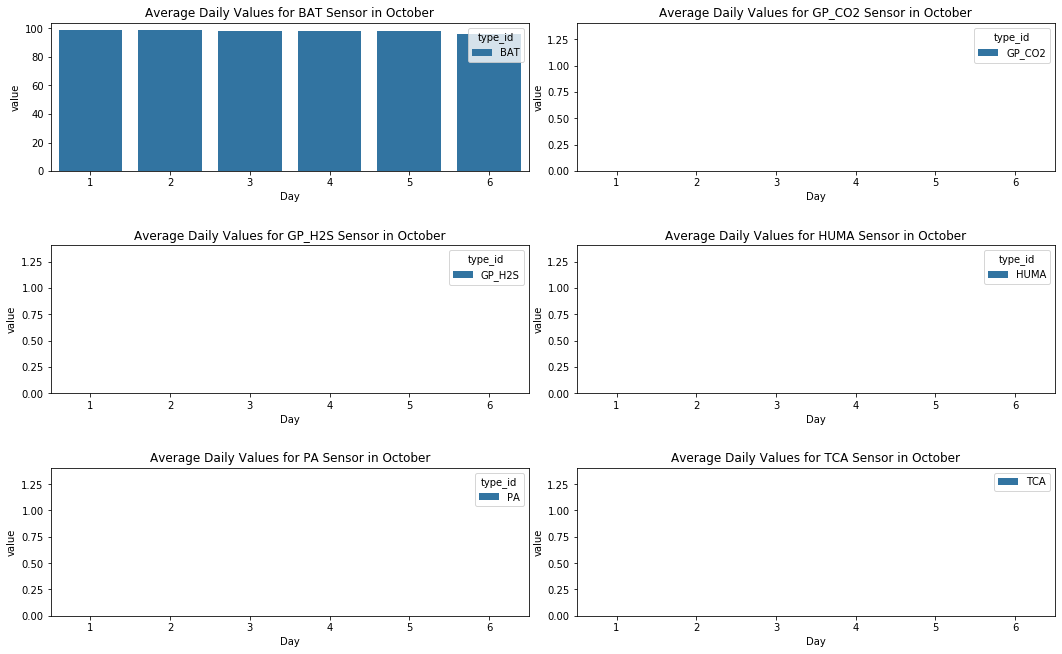

In [203]:
df16_max = data_4max[data_4max.type_id=="BAT"]
df17_max = data_4max[data_4max.type_id=="GP_CO2"]
df18_max = data_4max[data_4max.type_id=="GP_H2S"]
df19_max = data_4max[data_4max.type_id=="HUMA"]
df20_max = data_4max[data_4max.type_id=="PA"]
df21_max = data_4max[data_4max.type_id=="TCA"]

plt.figure(figsize=(18,15))
fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df16_max)
plt.title('Average Daily Values for BAT Sensor in October')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df17_max)
plt.title('Average Daily Values for GP_CO2 Sensor in October')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df18_max)
plt.title('Average Daily Values for GP_H2S Sensor in October')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df19_max)
plt.title('Average Daily Values for HUMA Sensor in October')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df20_max)
plt.title('Average Daily Values for PA Sensor in October')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df21_max)
plt.title('Average Daily Values for TCA Sensor in October')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

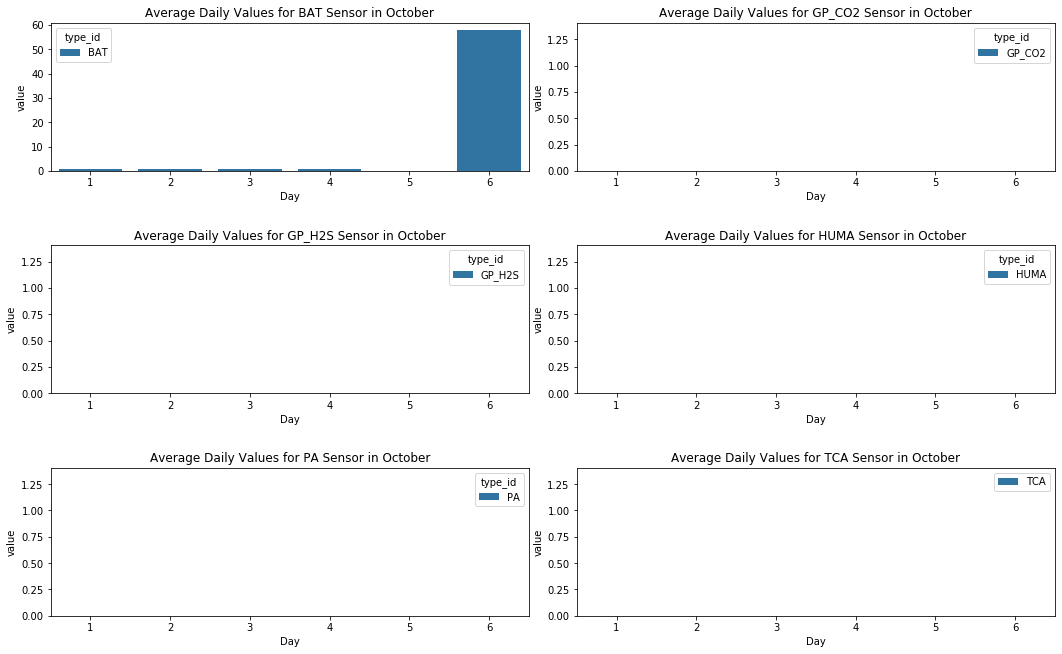

In [204]:
df16_min = data_4min[data_4min.type_id=="BAT"]
df17_min = data_4min[data_4min.type_id=="GP_CO2"]
df18_min = data_4min[data_4min.type_id=="GP_H2S"]
df19_min = data_4min[data_4min.type_id=="HUMA"]
df20_min = data_4min[data_4min.type_id=="PA"]
df21_min = data_4min[data_4min.type_id=="TCA"]

plt.figure(figsize=(18,15))
fig.suptitle('Vertically stacked subplots')
plt.subplot(4,2,1)
sns.barplot(x="Day", y="value", hue= "type_id", data=df16_min)
plt.title('Average Daily Values for BAT Sensor in October')
plt.subplot(4,2,2)
sns.barplot(x="Day", y="value", hue= "type_id", data=df17_min)
plt.title('Average Daily Values for GP_CO2 Sensor in October')
plt.subplot(4,2,3)
sns.barplot(x="Day", y="value", hue= "type_id", data=df18_min)
plt.title('Average Daily Values for GP_H2S Sensor in October')
plt.subplot(4,2,4)
sns.barplot(x="Day", y="value", hue= "type_id", data=df19_min)
plt.title('Average Daily Values for HUMA Sensor in October')
plt.subplot(4,2,5)
sns.barplot(x="Day", y="value", hue= "type_id", data=df20_min)
plt.title('Average Daily Values for PA Sensor in October')
plt.subplot(4,2,6)
sns.barplot(x="Day", y="value", hue= "type_id", data=df21_min)
plt.title('Average Daily Values for TCA Sensor in October')
#plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.legend()

In [ ]:
#data_s.mean().sort_values('se',ascending=False)

In [ ]:
#cust = merged_data.groupby('sens')
# data_1 = sensor_group.get_group("7635c920-8679-11e6-a353-2f6c041e2491")
# cust = cust.mean().sort_values('value',ascending=False)
# cust.shape

In [ ]:
# plt.figure(figsize=(25,5))
# sns.barplot(x=cust.index, y=cust['value'])
# plt.xticks(rotation=90)
# plt.title('Battery Sensor')

In [ ]:
#cust = sensor_group.mean().sort_values('value',ascending=True)

In [ ]:
#cust

In [ ]:
# plt.figure(figsize=(25,5))
# sns.barplot(x=cust.index, y=cust['value'])
# plt.xticks(rotation=90)
# plt.title('Account with highest balance')

In [ ]:
#sensor_group.first()

In [ ]:
#daily = merged_data[merged_data.type_id=='HUMA']['value'].resample('D')

### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/Corr_plot.JPG" width=450>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

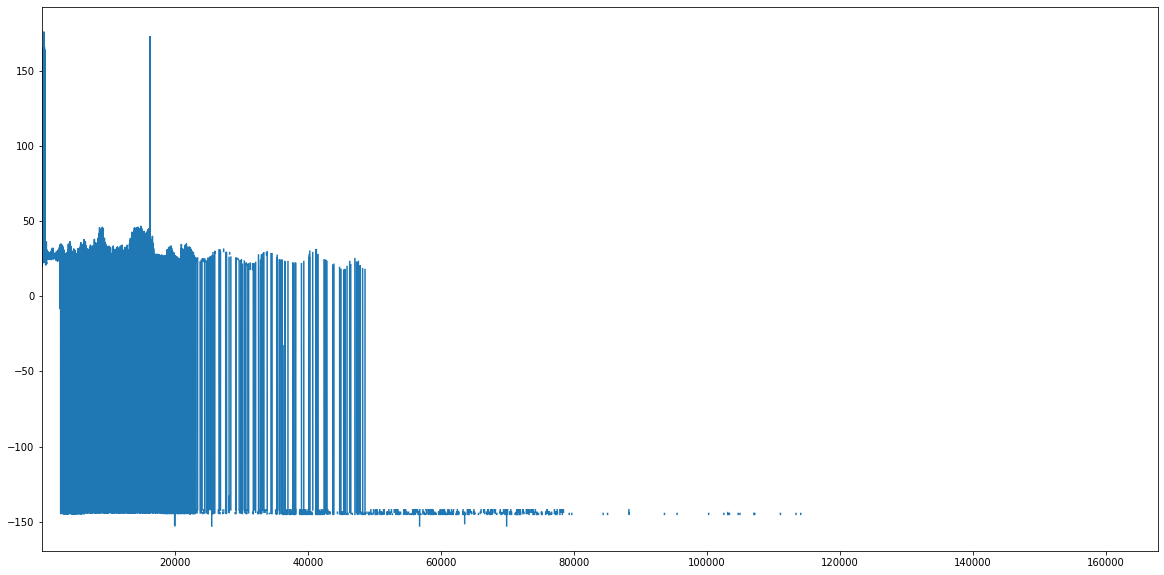

In [207]:
criteria = merged_data.type_id == 'TCA'
plt.figure(figsize=(20,10))
merged_data[criteria]['value'].plot()

In [ ]:
temp_sensors = [s for s in s2[s2.type_id =='TCA']['id_x']]
temperature_senors = [s for t,s in zip(s2['type_id'], s2['id_x']) if t=='TCA'] # alternative way

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

In [ ]:
plt.figure(figsize=(20,5))

for s in temp_sensors:
    #print(s)
    sub_df = full[full['sensor_id']==s]
    plt.plot(sub_df.index, sub_df['value'], '.')
    

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Creating Subplots - Each sensor gets its own panel**

In [ ]:
fig, axarr = plt.subplots(10, sharex=True)
fig.set_size_inches(20,30) 

plt.figure(figsize=(20,20))
for i,s in enumerate(temp_sensors):
    sub_df = full[full['sensor_id']==s]
    axarr[i].plot(sub_df.index, sub_df['value'], '.')
    

**Task: Creating a reshaped Data Frame of just Temperature sensors**

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [ ]:
# df.pivot(index='patient', columns='obs', values='score')

In [ ]:
temp_df = full[full['sensor_id'].isin(temp_sensors)]
del temp_df['timestamp']
temp_df = temp_df.reset_index()
temp_df.pivot(columns='sensor_id', values='value')



Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [ ]:
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [ ]:
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [ ]:
#temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')


In [ ]:
#daily_temp_cor_df = temp_df_cor.resample('D').mean()

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [ ]:
#corr_df = daily_temp_cor_df.corr()

In [ ]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True


In [ ]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
full2 = full.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [ ]:
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')


In [ ]:
daily_all_sensors = full_wide.resample('D').mean()

In [ ]:
daily_all_sensors

**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [ ]:
nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

In [ ]:
fullnode = pd.merge(full, nodes, left_on='node_id', right_on='id')

In [ ]:
fullnode.columns, fullnode.index

In [ ]:
fullnode.set_index('timestamp', inplace=True)

In [ ]:
fullnode.resample('D').mean()

In [ ]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')


In [ ]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [ ]:
fn_wide.head()

Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [ ]:
lmfn = fn_wide.resample('D').mean()

In [ ]:
lmfn.shape

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [ ]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [ ]:
train.columns

In [ ]:
target, predictors = 'battery', 'temperature'

x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train[target].to_frame()
x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test[target].to_frame()

In [ ]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))